### summary

In [8]:
# a_cifar10_train_vgg

from torchinfo import summary
summary(
    model=model, input_size=(1, 3, 32, 32),
    col_names=["kernel_size", "input_size", "output_size", "num_params", "mult_adds"]
)


Layer (type:depth-idx)                   Kernel Shape              Input Shape               Output Shape              Param #                   Mult-Adds
Sequential                               --                        [1, 3, 32, 32]            [1, 10]                   --                        --
├─Conv2d: 1-1                            [3, 3]                    [1, 3, 32, 32]            [1, 64, 32, 32]           1,792                     1,835,008
├─ReLU: 1-2                              --                        [1, 64, 32, 32]           [1, 64, 32, 32]           --                        --
├─MaxPool2d: 1-3                         2                         [1, 64, 32, 32]           [1, 64, 16, 16]           --                        --
├─Conv2d: 1-4                            [3, 3]                    [1, 64, 16, 16]           [1, 128, 16, 16]          73,856                    18,907,136
├─ReLU: 1-5                              --                        [1, 128, 16, 16]       

In [7]:
import torch.nn as nn

# 간단한 CNN 모델 정의
model = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=3, padding=1),  # Conv Layer
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),      # Pooling Layer
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),                              # Flatten Layer
    nn.Linear(8 * 8 * 128, 256),               # Fully Connected Layer
    nn.ReLU(),
    nn.Linear(256, 10)                         # Output Layer (10 classes)
)


In [9]:
pip install torchinfo


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import sys

# 각 경로를 추가합니다.
sys.path.append(r"C:\Users\User\git\link_dl\_00_data")
sys.path.append(r"C:\Users\User\git\link_dl\_01_code")
sys.path.append(r"C:\Users\User\git\link_dl\_02_homeworks")


In [11]:
!pip install torchinfo


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


### wandb

In [12]:
pip install --upgrade wandb


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import wandb
wandb.login()


True

##준비 코드

# [문제 1] Fashion MNIST 데이터 정규화를 위한 Mean과 Std.값 찾기

In [14]:
# from _01_code._99_common_utils.utils import get_num_cpu_cores, is_linux, is_windows

import os
import sys


def is_linux():
    if sys.platform.startswith("linux"):
        return True
    else:
        return False


def is_windows():
    if os.name == "nt":
        return True
    else:
        return False


def is_mac():
    if sys.platform == "darwin":
        return True
    else:
        return False


def get_num_cpu_cores():
    import multiprocessing
    return multiprocessing.cpu_count()


from string import Template

class DeltaTemplate(Template):
    delimiter = "%"

    def strfdelta(tdelta, fmt):
        d = {"D": tdelta.days}
        d["H"], rem = divmod(tdelta.seconds, 3600)
        d["M"], d["S"] = divmod(rem, 60)
        t = DeltaTemplate(fmt)
        return t.substitute(**d)


def strfdelta(td, fmt):

    # Get the timedelta’s sign and absolute number of seconds.
    sign = "-" if td.days < 0 else "+"
    secs = abs(td).total_seconds()

    # Break the seconds into more readable quantities.
    days, rem = divmod(secs, 86400)  # Seconds per day: 24 * 60 * 60
    hours, rem = divmod(rem, 3600)  # Seconds per hour: 60 * 60
    mins, secs = divmod(rem, 60)

    # Format (as per above answers) and return the result string.
    t = DeltaTemplate(fmt)
    return t.substitute(
        s=sign,
        D="{:d}".format(int(days)),
        H="{:02d}".format(int(hours)),
        M="{:02d}".format(int(mins)),
        S="{:02d}".format(int(secs)),
        )

In [15]:
import os
from pathlib import Path
import torch
import wandb
from torch import nn

from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import transforms

# 데이터 경로 설정
BASE_PATH = r"C:/Users/User/git/link_dl"
print(BASE_PATH)

import sys
sys.path.append(BASE_PATH)


C:/Users/User/git/link_dl


In [16]:
def get_fashion_mnist_data():
  data_path = os.path.join(BASE_PATH, "_00_data", "j_fashion_mnist")


  f_mnist_train = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())
  f_mnist_train, f_mnist_validation = random_split(f_mnist_train, [55_000, 5_000])

  print("Num Train Samples: ", len(f_mnist_train))
  print("Num Validation Samples: ", len(f_mnist_validation))
  print("Sample Shape: ", f_mnist_train[0][0].shape)  # torch.Size([1, 28, 28])

  num_data_loading_workers = get_num_cpu_cores() if is_linux() or is_windows() else 0
  print("Number of Data Loading Workers:", num_data_loading_workers)

  train_data_loader = DataLoader(
    dataset=f_mnist_train, batch_size=wandb.config.batch_size, shuffle=True,
    pin_memory=True, num_workers=num_data_loading_workers
  )

  validation_data_loader = DataLoader(
    dataset=f_mnist_validation, batch_size=wandb.config.batch_size,
    pin_memory=True, num_workers=num_data_loading_workers
  )

  f_mnist_transforms = nn.Sequential(
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=0.0, std=0.1),
  )

  return train_data_loader, validation_data_loader, f_mnist_transforms


def get_fashion_mnist_test_data():
  data_path = os.path.join(BASE_PATH, "_00_data", "j_fashion_mnist")

  f_mnist_test_images = datasets.FashionMNIST(data_path, train=False, download=True)
  f_mnist_test = datasets.FashionMNIST(data_path, train=False, download=True, transform=transforms.ToTensor())

  print("Num Test Samples: ", len(f_mnist_test))
  print("Sample Shape: ", f_mnist_test[0][0].shape)  # torch.Size([1, 28, 28])

  test_data_loader = DataLoader(dataset=f_mnist_test, batch_size=len(f_mnist_test))

  f_mnist_transforms = nn.Sequential(
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=0.0, std=0.1),
  )

  return f_mnist_test_images, test_data_loader, f_mnist_transforms


if __name__ == "__main__":
  config = {'batch_size': 2048,}
  wandb.init(mode="disabled", config=config)

  train_data_loader, validation_data_loader, f_mnist_transforms = get_fashion_mnist_data()
  print()
  f_mnist_test_images, test_data_loader, f_mnist_transforms = get_fashion_mnist_test_data()

Num Train Samples:  55000
Num Validation Samples:  5000
Sample Shape:  torch.Size([1, 28, 28])
Number of Data Loading Workers: 2

Num Test Samples:  10000
Sample Shape:  torch.Size([1, 28, 28])


In [17]:
import torch
from torch.utils.data import random_split, DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

In [20]:
data_path = "."

f_mnist_train = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())
f_mnist_train, f_mnist_validation = random_split(f_mnist_train, [55_000, 5_000])

In [21]:
print(len(f_mnist_train), len(f_mnist_validation))  # >>> 55000 5000

img_t, _ = f_mnist_train[0]
print(type(img_t))
print(img_t.shape)
print(img_t.min(), img_t.max())

55000 5000
<class 'torch.Tensor'>
torch.Size([1, 28, 28])
tensor(0.) tensor(1.)


In [22]:
imgs = torch.stack([img_t for img_t, _ in f_mnist_train], dim=3)
print(imgs.shape)

print(imgs.view(1, -1).mean(dim=-1))

print(imgs.view(1, -1).std(dim=-1))

torch.Size([1, 28, 28, 55000])
tensor([0.2861])
tensor([0.3531])


# [ 문제 2 ] Fashion MNIST 데이터에 대하여 CNN 학습시키기

### [memo]

#####

[utils]
   
[_01_code/_06_fcn_best_practice/c_trainer]   
class EarlyStopping   
class ClassificationTrainer   
    
[_01_code/_06_fcn_best_practice/f_mnist_train_fcn.py]   
get_mnist_data   
get_model   
main   
  
[_01_code/_06_fcn_best_practice/e_arg_parser.py]
   
[_01_code/_07_cnn/a_mnist_train_cnn.py]   
get_cnn_model   
main

### [code]

#### [train code]

##### import

In [52]:
### _01_code/_06_fcn_best_practice/c_trainer.py

from datetime import datetime
import os
import torch
from torch import nn

# BASE_PATH 설정
BASE_PATH = r"C:/Users/User/git/link_dl"
import sys
sys.path.append(BASE_PATH)

#from _01_code._99_common_utils.utils import strfdelta


### _01_code/_06_fcn_best_practice/f_mnist_train_fcn.py

import torch
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from datetime import datetime
import os
import wandb
from pathlib import Path

# BASE_PATH 설정
BASE_PATH = r"C:/Users/User/git/link_dl"
import sys
sys.path.append(BASE_PATH)

CURRENT_FILE_PATH = os.path.dirname(os.path.abspath("__file__"))
CHECKPOINT_FILE_PATH = os.path.join(CURRENT_FILE_PATH, "checkpoints")
if not os.path.isdir(CHECKPOINT_FILE_PATH):
  os.makedirs(os.path.join(CURRENT_FILE_PATH, "checkpoints"))

#from _01_code._99_common_utils.utils import is_linux, is_windows, get_num_cpu_cores
#from _01_code._06_fcn_best_practice.c_trainer import ClassificationTrainer
#from _01_code._06_fcn_best_practice.e_arg_parser import get_parser


### _01_code/_07_cnn/a_mnist_train_cnn.py

import torch
from torch import nn, optim
from datetime import datetime
import os
import wandb
from pathlib import Path

# BASE_PATH 설정
BASE_PATH = r"C:/Users/User/git/link_dl"
import sys
sys.path.append(BASE_PATH)

CURRENT_FILE_PATH = os.path.dirname(os.path.abspath("__file__"))
CHECKPOINT_FILE_PATH = os.path.join(CURRENT_FILE_PATH, "checkpoints")
if not os.path.isdir(CHECKPOINT_FILE_PATH):
  os.makedirs(os.path.join(CURRENT_FILE_PATH, "checkpoints"))

#from _01_code._06_fcn_best_practice.c_trainer import ClassificationTrainer
#from _01_code._06_fcn_best_practice.f_mnist_train_fcn import get_mnist_data
#from _01_code._06_fcn_best_practice.e_arg_parser import get_parser


### _02_homeworks/_03_fashion_mnist/a_fashion_mnist_data.py

import os
from pathlib import Path
import torch
import wandb
from torch import nn

from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import transforms

# BASE_PATH 설정
BASE_PATH = r"C:/Users/User/git/link_dl"
print(BASE_PATH)

import sys
sys.path.append(BASE_PATH)


### _01_code/_06_fcn_best_practice/a_data_mnist.py for 문제 1

import torch
from torch.utils.data import random_split, DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

# BASE_PATH 설정
BASE_PATH = r"C:/Users/User/git/link_dl"
import sys
sys.path.append(BASE_PATH)


### _01_code/_06_fcn_best_practice/d_tester.py

import os
import torch

# BASE_PATH 설정
BASE_PATH = r"C:/Users/User/git/link_dl"
import sys
sys.path.append(BASE_PATH)


### _01_code/_07_cnn/b_mnist_test_cnn.py

import numpy as np
import torch
import os

from matplotlib import pyplot as plt
from pathlib import Path

# BASE_PATH 설정
BASE_PATH = r"C:/Users/User/git/link_dl"
CURRENT_FILE_PATH = os.path.dirname(os.path.abspath("__file__"))
CHECKPOINT_FILE_PATH = os.path.join(CURRENT_FILE_PATH, "checkpoints")

import sys
sys.path.append(BASE_PATH)

#from _01_code/_07_cnn/a_mnist_train_cnn import get_cnn_model
#from _01_code._06_fcn_best_practice.d_tester import ClassificationTester
#from _01_code._06_fcn_best_practice.g_mnist_test_fcn import get_mnist_test_data


C:/Users/User/git/link_dl


##### utils

In [24]:
# _01_code/_99_common_utils/utils.py

import os
import sys


def is_linux():
    if sys.platform.startswith("linux"):
        return True
    else:
        return False


def is_windows():
    if os.name == "nt":
        return True
    else:
        return False


def is_mac():
    if sys.platform == "darwin":
        return True
    else:
        return False


def get_num_cpu_cores():
    import multiprocessing
    return multiprocessing.cpu_count()


from string import Template

class DeltaTemplate(Template):
    delimiter = "%"

    def strfdelta(tdelta, fmt):
        d = {"D": tdelta.days}
        d["H"], rem = divmod(tdelta.seconds, 3600)
        d["M"], d["S"] = divmod(rem, 60)
        t = DeltaTemplate(fmt)
        return t.substitute(**d)


def strfdelta(td, fmt):

    # Get the timedelta’s sign and absolute number of seconds.
    sign = "-" if td.days < 0 else "+"
    secs = abs(td).total_seconds()

    # Break the seconds into more readable quantities.
    days, rem = divmod(secs, 86400)  # Seconds per day: 24 * 60 * 60
    hours, rem = divmod(rem, 3600)  # Seconds per hour: 60 * 60
    mins, secs = divmod(rem, 60)

    # Format (as per above answers) and return the result string.
    t = DeltaTemplate(fmt)
    return t.substitute(
        s=sign,
        D="{:d}".format(int(days)),
        H="{:02d}".format(int(hours)),
        M="{:02d}".format(int(mins)),
        S="{:02d}".format(int(secs)),
        )


if __name__ == "__main__":
    if is_linux():
        print("Linux")
    elif is_windows():
        print("Windows")
    elif is_mac():
        print("Mac")
    else:
        print("<unknown>")


Linux


##### class EarlyStopping

In [25]:
class EarlyStopping:
  """Early stops the training if validation loss doesn't improve after a given patience."""
  def __init__(self, patience=10, delta=0.00001, project_name=None, checkpoint_file_path=None, run_time_str=None):
    self.patience = patience
    self.counter = 0
    self.delta = delta

    self.val_loss_min = None
    self.file_path = os.path.join(
      checkpoint_file_path, f"{project_name}_checkpoint_{run_time_str}.pt"
    )
    self.latest_file_path = os.path.join(
      checkpoint_file_path, f"{project_name}_checkpoint_latest.pt"
    )

  def check_and_save(self, new_validation_loss, model):
    early_stop = False

    if self.val_loss_min is None:
      self.val_loss_min = new_validation_loss
      message = f'Early stopping is stated!'
    elif new_validation_loss < self.val_loss_min - self.delta:
      message = f'V_loss decreased ({self.val_loss_min:7.5f} --> {new_validation_loss:7.5f}). Saving model...'
      self.save_checkpoint(new_validation_loss, model)
      self.val_loss_min = new_validation_loss
      self.counter = 0
    else:
      self.counter += 1
      message = f'Early stopping counter: {self.counter} out of {self.patience}'
      if self.counter >= self.patience:
        early_stop = True
        message += " *** TRAIN EARLY STOPPED! ***"

    return message, early_stop

  def save_checkpoint(self, val_loss, model):
    '''Saves model when validation loss decrease.'''
    torch.save(model.state_dict(), self.file_path)
    torch.save(model.state_dict(), self.latest_file_path)
    self.val_loss_min = val_loss




##### class ClassificationTrainer

In [2]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from datetime import datetime


# EarlyStopping 클래스 정의
class EarlyStopping:
    def __init__(self, patience, delta, project_name, checkpoint_file_path, run_time_str):
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.checkpoint_file_path = checkpoint_file_path

    def check_and_save(self, validation_loss, model):
        if self.best_loss is None or validation_loss < self.best_loss - self.delta:
            self.best_loss = validation_loss
            self.counter = 0
            torch.save(model.state_dict(), self.checkpoint_file_path)
            return "Model saved", False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
                return "Early stopping", True
            return "No improvement", False


# strfdelta 함수 정의
def strfdelta(delta, fmt):
    d = {"D": delta.days}
    d["H"], rem = divmod(delta.seconds, 3600)
    d["M"], d["S"] = divmod(rem, 60)
    return fmt.format(**d)


# ClassificationTrainer 클래스 정의
class ClassificationTrainer:
    def __init__(
        self, project_name, model, optimizer, train_data_loader, validation_data_loader, transforms,
        run_time_str, wandb, device, checkpoint_file_path
    ):
        self.project_name = project_name
        self.model = model
        self.optimizer = optimizer
        self.train_data_loader = train_data_loader
        self.validation_data_loader = validation_data_loader
        self.transforms = transforms
        self.run_time_str = run_time_str
        self.wandb = wandb
        self.device = device
        self.checkpoint_file_path = checkpoint_file_path
        self.loss_fn = nn.CrossEntropyLoss()

    def do_train(self):
        self.model.train()
        loss_train = 0.0
        num_corrects_train = 0
        num_trained_samples = 0
        num_trains = 0

        for train_batch in self.train_data_loader:
            input_train, target_train = train_batch
            input_train = input_train.to(device=self.device)
            target_train = target_train.to(device=self.device)

            if self.transforms:
                input_train = self.transforms(input_train)

            output_train = self.model(input_train)
            loss = self.loss_fn(output_train, target_train)
            loss_train += loss.item()

            predicted_train = torch.argmax(output_train, dim=1)
            num_corrects_train += torch.sum(torch.eq(predicted_train, target_train)).item()

            num_trained_samples += len(input_train)
            num_trains += 1

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        train_loss = loss_train / num_trains
        train_accuracy = 100.0 * num_corrects_train / num_trained_samples
        return train_loss, train_accuracy

    def do_validation(self):
        self.model.eval()
        loss_validation = 0.0
        num_corrects_validation = 0
        num_validated_samples = 0
        num_validations = 0

        with torch.no_grad():
            for validation_batch in self.validation_data_loader:
                input_validation, target_validation = validation_batch
                input_validation = input_validation.to(device=self.device)
                target_validation = target_validation.to(device=self.device)

                if self.transforms:
                    input_validation = self.transforms(input_validation)

                output_validation = self.model(input_validation)
                loss_validation += self.loss_fn(output_validation, target_validation).item()

                predicted_validation = torch.argmax(output_validation, dim=1)
                num_corrects_validation += torch.sum(torch.eq(predicted_validation, target_validation)).item()

                num_validated_samples += len(input_validation)
                num_validations += 1

        validation_loss = loss_validation / num_validations
        validation_accuracy = 100.0 * num_corrects_validation / num_validated_samples
        return validation_loss, validation_accuracy

    def train_loop(self):
        early_stopping = EarlyStopping(
            patience=self.wandb.config.early_stop_patience,
            delta=self.wandb.config.early_stop_delta,
            project_name=self.project_name,
            checkpoint_file_path=self.checkpoint_file_path,
            run_time_str=self.run_time_str
        )
        n_epochs = self.wandb.config.epochs
        training_start_time = datetime.now()

        for epoch in range(1, n_epochs + 1):
            train_loss, train_accuracy = self.do_train()

            if epoch == 1 or epoch % self.wandb.config.validation_intervals == 0:
                validation_loss, validation_accuracy = self.do_validation()
                elapsed_time = datetime.now() - training_start_time
                epoch_per_second = 0 if elapsed_time.seconds == 0 else epoch / elapsed_time.seconds

                message, early_stop = early_stopping.check_and_save(validation_loss, self.model)

                print(
                    f"[Epoch {epoch:>3}] "
                    f"T_loss: {train_loss:7.5f}, "
                    f"T_accuracy: {train_accuracy:6.4f} | "
                    f"V_loss: {validation_loss:7.5f}, "
                    f"V_accuracy: {validation_accuracy:6.4f} | "
                    f"{message} | "
                    f"T_time: {strfdelta(elapsed_time, '%H:%M:%S')}, "
                    f"T_speed: {epoch_per_second:4.3f}"
                )

                self.wandb.log({
                    "Epoch": epoch,
                    "Training loss": train_loss,
                    "Training accuracy (%)": train_accuracy,
                    "Validation loss": validation_loss,
                    "Validation accuracy (%)": validation_accuracy,
                    "Training speed (epochs/sec.)": epoch_per_second,
                })

                if early_stop:
                    break

        elapsed_time = datetime.now() - training_start_time
        print(f"Final training time: {strfdelta(elapsed_time, '%H:%M:%S')}")


# Argument parser 정의
def get_parser():
    parser = argparse.ArgumentParser(description="Train a CNN model.")
    parser.add_argument("--wandb", action="store_true", help="Enable WandB logging")
    parser.add_argument("-b", "--batch_size", type=int, default=2048, help="Batch size")
    parser.add_argument("-r", "--learning_rate", type=float, default=1e-3, help="Learning rate")
    parser.add_argument("-v", "--epochs", type=int, default=10, help="Number of epochs")
    parser.add_argument("--validation_intervals", type=int, default=1, help="Validation interval epochs")
    parser.add_argument("--early_stop_patience", type=int, default=10, help="Patience for early stopping")
    parser.add_argument("--early_stop_delta", type=float, default=1e-5, help="Delta for early stopping")
    return parser


# Main 함수 정의
def main(args):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.FashionMNIST("./data", train=True, download=True, transform=transform)
    validation_dataset = datasets.FashionMNIST("./data", train=False, download=True, transform=transform)

    train_data_loader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True)
    validation_data_loader = DataLoader(validation_dataset, batch_size=args.batch_size, shuffle=False)

    model = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Flatten(),
        nn.Linear(32 * 14 * 14, 10),
    ).to(device)

    optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)

    # WandB 초기화
    import wandb
    if args.wandb:
        wandb.init(project="fashion_mnist", config=vars(args))

    classification_trainer = ClassificationTrainer(
        project_name="fashion_mnist",
        model=model,
        optimizer=optimizer,
        train_data_loader=train_data_loader,
        validation_data_loader=validation_data_loader,
        transforms=None,
        run_time_str=datetime.now().strftime("%Y%m%d_%H%M%S"),
        wandb=wandb if args.wandb else None,
        device=device,
        checkpoint_file_path="./checkpoint.pth"
    )
    classification_trainer.train_loop()


if __name__ == "__main__":
    # 명령줄 인자를 문자열로 강제 설정
    args_str = "--wandb -b 2048 -r 1e-3 -v 10 --validation_intervals 1 --early_stop_patience 10 --early_stop_delta 1e-5"
    args_list = args_str.split()

    parser = get_parser()
    args = parser.parse_args(args_list)  # 문자열로 전달된 인자 리스트를 파싱
    main(args)



100% 26421880/26421880 [00:13<00:00, 1964478.54it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100% 29515/29515 [00:00<00:00, 103031.90it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100% 4422102/4422102 [00:03<00:00, 1443844.33it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100% 5148/5148 [00:00<00:00, 4126175.61it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: choo0412 (choo0412-korea-university-of-technology-and-education). Use `wandb login --relogin` to force relogin


[Epoch   1] T_loss: 0.87996, T_accuracy: 70.2533 | V_loss: 0.56986, V_accuracy: 79.8000 | Model saved | T_time: %H:%M:%S, T_speed: 0.111
[Epoch   2] T_loss: 0.49276, T_accuracy: 82.9367 | V_loss: 0.46878, V_accuracy: 83.4400 | Model saved | T_time: %H:%M:%S, T_speed: 0.111
[Epoch   3] T_loss: 0.41984, T_accuracy: 85.5100 | V_loss: 0.41516, V_accuracy: 85.5400 | Model saved | T_time: %H:%M:%S, T_speed: 0.100
[Epoch   4] T_loss: 0.38080, T_accuracy: 87.0067 | V_loss: 0.38946, V_accuracy: 86.4300 | Model saved | T_time: %H:%M:%S, T_speed: 0.098
[Epoch   5] T_loss: 0.35733, T_accuracy: 87.5450 | V_loss: 0.37706, V_accuracy: 86.8700 | Model saved | T_time: %H:%M:%S, T_speed: 0.100
[Epoch   6] T_loss: 0.33642, T_accuracy: 88.3167 | V_loss: 0.35434, V_accuracy: 87.6200 | Model saved | T_time: %H:%M:%S, T_speed: 0.102
[Epoch   7] T_loss: 0.32041, T_accuracy: 88.9700 | V_loss: 0.34478, V_accuracy: 87.7400 | Model saved | T_time: %H:%M:%S, T_speed: 0.101
[Epoch   8] T_loss: 0.31149, T_accuracy: 

##### get_parser

In [4]:
import argparse

def get_parser():
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=False, help="True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=2_048, help="Batch size (int, default: 2_048)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=10_000, help="Number of training epochs (int, default:10_000)"
  )

  parser.add_argument(
    "-r", "--learning_rate", type=float, default=1e-3, help="Learning rate (float, default: 1e-3)"
  )

  parser.add_argument(
    "-v", "--validation_intervals", type=int, default=10,
    help="Number of training epochs between validations (int, default: 10)"
  )

  parser.add_argument(
    "-d", "--early_stop_delta", type=float, default=0.00001,
    help="Delta value of early stop (float, default: 0.00001)"
  )

  parser.add_argument(
    "-p", "--early_stop_patience", type=int, default=10,
    help="Number of early stop patience (int, default: 10)"
  )

  parser.add_argument(
    "-o", "--optimizer", type=int, default=0,
    help="Optimizers (0: SGD, 1: Momentum, 2: RMSProp, 4: Adam, default: 0)"
  )

  parser.add_argument(
    "-w", "--weight_decay", type=float, default=0.0, help="Weight decay (float, default: 0.0)"
  )

  parser.add_argument(
    "--dropout", action=argparse.BooleanOptionalAction, default=False, help="Dropout: True or False"
  )
  parser.add_argument(
    "-n", "--normalization", type=int, default=0,
    help="Normalization (0: No Normalization, 1: BatchNorm, 2: LayerNorm, default: 0)"
  )

  return parser


##### get_mnist_data

In [5]:
def get_mnist_data(flatten=False):
    # Define the base data path using BASE_PATH
    data_path = os.path.join(BASE_PATH, "_00_data", "h_mnist")

    # Download and split MNIST dataset
    mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transforms.ToTensor())
    mnist_train, mnist_validation = random_split(mnist_train, [55_000, 5_000])

    # Display dataset information
    print("Num Train Samples:", len(mnist_train))
    print("Num Validation Samples:", len(mnist_validation))

    # Set the number of data loading workers
    num_data_loading_workers = get_num_cpu_cores() if is_linux() or is_windows() else 0
    print("Number of Data Loading Workers:", num_data_loading_workers)

    # Define data loaders
    train_data_loader = DataLoader(
        dataset=mnist_train, batch_size=wandb.config.batch_size, shuffle=True,
        pin_memory=True, num_workers=num_data_loading_workers
    )

    validation_data_loader = DataLoader(
        dataset=mnist_validation, batch_size=wandb.config.batch_size,
        pin_memory=True, num_workers=num_data_loading_workers
    )

    # Define transforms with optional flattening
    mnist_transforms = nn.Sequential(
        transforms.ConvertImageDtype(torch.float),
        transforms.Normalize(mean=0.1307, std=0.3081),
    )

    if flatten:
        mnist_transforms.append(nn.Flatten())

    return train_data_loader, validation_data_loader, mnist_transforms


##### get_fashion_mnist_data with mean, std

In [6]:
global globalMean
global globalStd

In [7]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

def get_num_cpu_cores():
    return os.cpu_count()

def is_linux():
    return os.name == 'posix'

def is_windows():
    return os.name == 'nt'


In [ ]:
def get_fashion_mnist_data():
    import os
    import torch
    import torch.nn as nn
    from torch.utils.data import DataLoader, random_split
    from torchvision import datasets, transforms
    import wandb

    # 데이터 경로 설정
    data_path = os.path.join("BASE_PATH", "_00_data", "j_fashion_mnist")

    # 기본 FashionMNIST 데이터셋 로드
    f_mnist_train = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())
    f_mnist_train, f_mnist_validation = random_split(f_mnist_train, [55_000, 5_000])

    print("Num Train Samples: ", len(f_mnist_train))
    print("Num Validation Samples: ", len(f_mnist_validation))
    print("Sample Shape: ", f_mnist_train[0][0].shape)  # torch.Size([1, 28, 28])

    # 데이터 로딩 워커 설정
    num_data_loading_workers = get_num_cpu_cores() if is_linux() or is_windows() else 0
    print("Number of Data Loading Workers:", num_data_loading_workers)

    # Train 데이터셋에 증강 추가
    train_transforms = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),  # 50% 확률로 좌우 반전
        transforms.RandomRotation(10),          # 최대 10도 회전
        transforms.ToTensor()
    ])

    validation_transforms = transforms.Compose([
        transforms.ToTensor()
    ])

    # Transform 적용
    f_mnist_train.dataset.transform = train_transforms
    f_mnist_validation.dataset.transform = validation_transforms

    # 데이터 로더 설정
    train_data_loader = DataLoader(
        dataset=f_mnist_train, batch_size=wandb.config.batch_size, shuffle=True,
        pin_memory=True, num_workers=num_data_loading_workers
    )

    validation_data_loader = DataLoader(
        dataset=f_mnist_validation, batch_size=wandb.config.batch_size,
        pin_memory=True, num_workers=num_data_loading_workers
    )

    # Normalization 계산
    imgs = torch.stack([img_t for img_t, _ in f_mnist_train], dim=3)
    globalMean = imgs.view(1, -1).mean(dim=-1)
    globalStd = imgs.view(1, -1).std(dim=-1)

    print(f"Calculated Mean: {globalMean.item()}, Std: {globalStd.item()}")

    # Normalization Transform
    f_mnist_transforms = nn.Sequential(
        transforms.ConvertImageDtype(torch.float),
        transforms.Normalize(mean=globalMean, std=globalStd),
    )

    return train_data_loader, validation_data_loader, f_mnist_transforms


##### get_augmented_fashion_mnist_data

In [9]:
from torch.utils.data import ConcatDataset

def get_augmented_fashion_mnist_data():
  data_path = os.path.join("C:/Users/User/git/link_dl", "_00_data", "j_fashion_mnist")

  f_mnist_train = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())
  f_mnist_train, f_mnist_validation = random_split(f_mnist_train, [55_000, 5_000])

  #####################################################################
  f_mnist_train_transforms = nn.Sequential(
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop([28, 28], padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
  )

  transformed_train_data = []
  for image, label in f_mnist_train:
    transformed_image = f_mnist_train_transforms(image)
    transformed_train_data.append((transformed_image, label))

  f_mnist_train = ConcatDataset([f_mnist_train, transformed_train_data])
  #####################################################################

  print("Num Train Samples: ", len(f_mnist_train))
  print("Num Validation Samples: ", len(f_mnist_validation))
  print("Sample Shape: ", f_mnist_train[0][0].shape)  # torch.Size([1, 28, 28])

  num_data_loading_workers = get_num_cpu_cores() if is_linux() or is_windows() else 0
  print("Number of Data Loading Workers:", num_data_loading_workers)

  train_data_loader = DataLoader(
    dataset=f_mnist_train, batch_size=wandb.config.batch_size, shuffle=True,
    pin_memory=True, num_workers=num_data_loading_workers
  )

  validation_data_loader = DataLoader(
    dataset=f_mnist_validation, batch_size=wandb.config.batch_size,
    pin_memory=True, num_workers=num_data_loading_workers
  )

  #####################################################################
  # mean, std
  global globalMean
  global globalStd

  imgs = torch.stack([img_t for img_t, _ in f_mnist_train], dim=3)
  globalMean = imgs.view(1, -1).mean(dim=-1)
  globalStd = imgs.view(1, -1).std(dim=-1)
  #####################################################################

  """
  f_mnist_transforms = nn.Sequential(
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=0.0, std=0.1),
  )
  """
  f_mnist_transforms = nn.Sequential(
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=globalMean, std=globalStd),
  )

  return train_data_loader, validation_data_loader, f_mnist_transforms

##### get_cnn_model

In [10]:
def get_cnn_model():
  class MyModel(nn.Module):
    def __init__(self, in_channels, n_output):
      super().__init__()

      self.model = nn.Sequential(
        # B x 1 x 28 x 28 --> B x 6 x (28 - 5 + 1) x (28 - 5 + 1) = B x 6 x 24 x 24
        nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=(5, 5), stride=(1, 1)),
        # B x 6 x 24 x 24 --> B x 6 x 12 x 12
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.ReLU(),
        # B x 6 x 12 x 12 --> B x 16 x (12 - 5 + 1) x (12 - 5 + 1) = B x 16 x 8 x 8
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1, 1)),
        # B x 16 x 8 x 8 --> B x 16 x 4 x 4
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, n_output),
      )

    def forward(self, x):
      x = self.model(x)
      return x

  # 1 * 28 * 28
  my_model = MyModel(in_channels=1, n_output=10)

  return my_model


##### get_my_cnn_model

In [11]:
def get_my_cnn_model():
  class MyModel(nn.Module):
    def __init__(self, in_channels, n_output):
      super().__init__()

      self.model = nn.Sequential(
        # B x 1 x 28 x 28 --> B x 6 x (28 - 5 + 1) x (28 - 5 + 1) = B x 6 x 24 x 24
        nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=(5, 5), stride=(1, 1)),
        # B x 6 x 24 x 24 --> B x 6 x 12 x 12
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.ReLU(),
        # B x 6 x 12 x 12 --> B x 16 x (12 - 5 + 1) x (12 - 5 + 1) = B x 16 x 8 x 8
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1, 1)),
        # B x 16 x 8 x 8 --> B x 16 x 4 x 4
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, n_output),
      )

    def forward(self, x):
      x = self.model(x)
      return x

  # 1 * 28 * 28
  my_model = MyModel(in_channels=1, n_output=10)

  return my_model


##### get_my_cnn_model_with_dropout

In [12]:
def get_my_cnn_model_with_dropout():
  class MyModel(nn.Module):
    def __init__(self, in_channels, n_output):
      super().__init__()

      self.model = nn.Sequential(
        # B x 1 x 28 x 28 --> B x 6 x (28 - 5 + 1) x (28 - 5 + 1) = B x 6 x 24 x 24
        nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=(5, 5), stride=(1, 1)),
        # B x 6 x 24 x 24 --> B x 6 x 12 x 12
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.ReLU(),
        # B x 6 x 12 x 12 --> B x 16 x (12 - 5 + 1) x (12 - 5 + 1) = B x 16 x 8 x 8
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1, 1)),
        # B x 16 x 8 x 8 --> B x 16 x 4 x 4
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Dropout(p=0.5), # p: dropout probability
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(p=0.5), # p: dropout probability
        nn.Linear(128, n_output),
      )

    def forward(self, x):
      x = self.model(x)
      return x

  # 1 * 28 * 28
  my_model = MyModel(in_channels=1, n_output=10)

  return my_model


##### get_my_cnn_model_with_dropout_batchNormalization

In [15]:
def get_my_cnn_model_with_dropout_batchNormalization():
    class MyModel(nn.Module):
        def __init__(self, in_channels, n_output):
            super().__init__()

            self.model = nn.Sequential(
                # B x 1 x 28 x 28 --> B x 32 x 24 x 24
                nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=5, stride=1),
                nn.BatchNorm2d(num_features=32),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),  # B x 32 x 12 x 12

                # B x 32 x 12 x 12 --> B x 64 x 8 x 8
                nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1),
                nn.BatchNorm2d(num_features=64),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),  # B x 64 x 4 x 4

                nn.Flatten(),  # B x (64 * 4 * 4) = B x 1024

                nn.Dropout(p=0.5),  # Fully Connected Layer 전 드롭아웃
                nn.Linear(1024, 256),
                nn.BatchNorm1d(num_features=256),
                nn.ReLU(),

                nn.Dropout(p=0.5),  # 드롭아웃 추가
                nn.Linear(256, 128),
                nn.BatchNorm1d(num_features=128),
                nn.ReLU(),

                nn.Linear(128, n_output),
            )

        def forward(self, x):
            return self.model(x)

    # 입력 채널: 1 (흑백 이미지), 출력 클래스: 10
    return MyModel(in_channels=1, n_output=10)


##### get_my_cnn_model_with_dropout_layerNormalization

In [14]:
def get_my_cnn_model_with_dropout_layerNormalization():
  class MyModel(nn.Module):
    def __init__(self, in_channels, n_output):
      super().__init__()

      self.model = nn.Sequential(
        # B x 1 x 28 x 28 --> B x 6 x (28 - 5 + 1) x (28 - 5 + 1) = B x 6 x 24 x 24
        nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=(5, 5), stride=(1, 1)),
        # B x 6 x 24 x 24 --> B x 6 x 12 x 12
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LayerNorm(normalized_shape=[6, 12, 12], eps=1e-05),
        nn.ReLU(),
        # B x 6 x 12 x 12 --> B x 16 x (12 - 5 + 1) x (12 - 5 + 1) = B x 16 x 8 x 8
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1, 1)),
        # B x 16 x 8 x 8 --> B x 16 x 4 x 4
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LayerNorm(normalized_shape=[16, 4, 4], eps=1e-05),
        nn.ReLU(),
        nn.Flatten(),
        nn.Dropout(p=0.5), # p: dropout probability
        nn.Linear(256, 128),
        nn.LayerNorm(normalized_shape=[128], eps=1e-05),
        nn.ReLU(),
        nn.Dropout(p=0.5), # p: dropout probability
        nn.Linear(128, n_output),
      )

    def forward(self, x):
      x = self.model(x)
      return x

  # 1 * 28 * 28
  my_model = MyModel(in_channels=1, n_output=10)

  return my_model


##### get_alexnet_model

In [15]:
def get_alexnet_model():
    class AlexNet(nn.Module):
        def __init__(self, in_channels=1, n_output=10):
            """
            Define and allocate layers for this neural net.
            """
            super().__init__()
            # The image in the original paper states that width and height are 224 pixels, but
            # the correct input size should be: (B x 3 x 227 x 227)
            self.cnn = nn.Sequential(
                # B x 1 x 28 x 28 --> B x 96 x (28 - 11 + 4) x (28 - 11 + 4) = B x 96 x 26 x 26
                nn.Conv2d(in_channels=in_channels, out_channels=96, kernel_size=(11, 11), stride=(4, 4)),
                nn.ReLU(),
                #nn.LocalResponseNorm(size=3, alpha=0.0001, beta=0.75, k=2),

                # B x 96 x 26 x 26 --> B x 96 x ((26 - 2) / 2 + 1) x ((26 - 2) / 2 + 1) = B x 96 x 13 x 13
                nn.MaxPool2d(kernel_size=3, stride=2),

                # B x 96 x 13 x 13 --> B x 192 x ((13 - 3 + 2) / 1 + 1) x ((13 - 3 + 2) / 1 + 1) = B x 192 x 13 x 13
                nn.Conv2d(96, 256, (3, 3), (1, 1), padding=1),
                nn.ReLU(),
                #nn.LocalResponseNorm(size=3, alpha=0.0001, beta=0.75, k=2),

                # B x 192 x 13 x 13 --> B x 192 x ((13 - 3) / 2 + 1) x ((13 - 3) / 2 + 1) = B x 192 x 6 x 6
                nn.MaxPool2d(kernel_size=3, stride=2),

                # B x 192 x 6 x 6 --> B x 256 x ((6 - 3 + 2) / 1 + 1) x ((13 - 3 + 2) / 1 + 1) = B x 256 x 6 x 6
                nn.Conv2d(256, 384, (3, 3), (1, 1), padding=1),
                nn.ReLU(),

                # B x 256 x 6 x 6 --> B x 256 x ((6 - 3 + 2) / 1 + 1) x ((13 - 3 + 2) / 1 + 1) = B x 256 x 6 x 6
                nn.Conv2d(384, 384, (3, 3), (1, 1), padding=1),
                nn.ReLU(),

                # B x 256 x 6 x 6 --> B x 192 x ((6 - 2) / 1 + 1) x ((6 - 2) / 1 + 1) = B x 192 x 5 x 5
                nn.Conv2d(384, 256, (2, 2), (1, 1)),
                nn.ReLU(),

                # B x 192 x 5 x 5 --> B x 192 x ((5 - 2) / 2 + 1) x ((5 - 2) / 2 + 1) = B x 192 x 2 x 2
                nn.MaxPool2d(kernel_size=3, stride=2)
            )
            # classifier is just a name for linear layers
            self.fcn = nn.Sequential(
                nn.Dropout(p=0.5),
                nn.Linear(in_features=192 * 2 * 2, out_features=512),
                nn.ReLU(),
                nn.Dropout(p=0.5),
                nn.Linear(in_features=512, out_features=512),
                nn.ReLU(),
                nn.Linear(in_features=512, out_features=n_output),
            )

        def forward(self, x):
            """
            Pass the input through the net.
            """
            x = self.cnn(x)
            x = x.view(-1, 192 * 2 * 2)  # reduce the dimensions for linear layer input
            return self.fcn(x)

    my_model = AlexNet(in_channels=1, n_output=10)

    return my_model


##### get_VGG_model

In [16]:
def get_vgg_model():
  def vgg_block(num_conv_layers, out_channels):
    layers = []

    for _ in range(num_conv_layers):
      layers.append(nn.LazyConv2d(out_channels=out_channels, kernel_size=3, padding=1))
      layers.append(nn.ReLU())

    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))

    block = nn.Sequential(*layers)
    return block

  class VGG(nn.Module):
    def __init__(self, block_info, n_output=10):
      super().__init__()

      conv_blocks = []
      for (num_conv_layers, out_channels) in block_info:
        conv_blocks.append(vgg_block(num_conv_layers, out_channels))

      self.model = nn.Sequential(
        *conv_blocks,
        nn.Flatten(),
        nn.LazyLinear(out_features=512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.LazyLinear(out_features=512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.LazyLinear(n_output)
      )

    def forward(self, x):
      x = self.model(x)
      return x

  my_model = VGG(
    block_info=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512)),
    n_output=10
  )

  return my_model

##### get_googlenet_model

In [17]:
def get_googlenet_model():
  class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
      super(Inception, self).__init__(**kwargs)
      # Branch 1
      self.b1_1 = nn.LazyConv2d(out_channels=c1, kernel_size=1)
      # Branch 2
      self.b2_1 = nn.LazyConv2d(out_channels=c2[0], kernel_size=1)
      self.b2_2 = nn.LazyConv2d(out_channels=c2[1], kernel_size=3, padding=1)
      # Branch 3
      self.b3_1 = nn.LazyConv2d(out_channels=c3[0], kernel_size=1)
      self.b3_2 = nn.LazyConv2d(out_channels=c3[1], kernel_size=5, padding=2)
      # Branch 4
      self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
      self.b4_2 = nn.LazyConv2d(out_channels=c4, kernel_size=1)

    def forward(self, x):
      b1 = torch.relu(self.b1_1(x))
      b2 = torch.relu(self.b2_2(torch.relu(self.b2_1(x))))
      b3 = torch.relu(self.b3_2(torch.relu(self.b3_1(x))))
      b4 = torch.relu(self.b4_2(self.b4_1(x)))
      return torch.cat((b1, b2, b3, b4), dim=1)

  class InceptionAux(nn.Module):
    def __init__(self, n_outputs, **kwargs):
      super(InceptionAux, self).__init__(**kwargs)

      self.conv = nn.Sequential(
        #nn.AvgPool2d(kernel_size=5, stride=3),
        nn.LazyConv2d(out_channels=128, kernel_size=1),
      )

      self.fc = nn.Sequential(
        nn.LazyLinear(out_features=1024),
        nn.ReLU(),
        nn.Dropout(),
        nn.LazyLinear(out_features=n_outputs),
      )

    def forward(self, x):
      x = self.conv(x)
      x = x.view(x.shape[0], -1)
      x = self.fc(x)
      return x

  class GoogleNet(nn.Module):
    def __init__(self, n_outputs=10):
      super(GoogleNet, self).__init__()
      self.conv_block = nn.Sequential(self.conv_blk_1(), self.conv_blk_2())
      self.inception_block_1 = self.inception_blk_1()
      self.inception_block_2 = self.inception_blk_2()
      self.inception_block_3 = self.inception_blk_3()
      self.aux_1 = InceptionAux(n_outputs)
      self.aux_2 = InceptionAux(n_outputs)

    def conv_blk_1(self):
      # LocalRespNorm is ignored
      return nn.Sequential(
        nn.LazyConv2d(out_channels=64, kernel_size=7, stride=2, padding=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
      )

    def conv_blk_2(self):
      # LocalRespNorm is ignored
      return nn.Sequential(
        nn.LazyConv2d(out_channels=64, kernel_size=1),
        nn.ReLU(),
        nn.LazyConv2d(out_channels=192, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
      )

    def inception_blk_1(self):
      return nn.Sequential(
        Inception(c1=64, c2=(96, 128), c3=(16, 32), c4=32),
        Inception(c1=128, c2=(128, 192), c3=(32, 96), c4=64),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
        Inception(c1=192, c2=(96, 208), c3=(16, 48), c4=64),
      )

    def inception_blk_2(self):
      return nn.Sequential(
        Inception(c1=160, c2=(112, 224), c3=(24, 64), c4=64),
        Inception(c1=128, c2=(128, 256), c3=(24, 64), c4=64),
        Inception(c1=112, c2=(144, 288), c3=(32, 64), c4=64),
      )

    def inception_blk_3(self):
      return nn.Sequential(
        Inception(c1=256, c2=(160, 320), c3=(32, 128), c4=128),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
        Inception(c1=256, c2=(160, 320), c3=(32, 128), c4=128),
        Inception(c1=384, c2=(192, 384), c3=(48, 128), c4=128),
        nn.AdaptiveAvgPool2d((1, 1)),
        nn.Flatten()
      )

    def forward(self, x):
      x = self.conv_block(x)
      inception_out_1 = self.inception_block_1(x)
      aux_out_1 = self.aux_1(inception_out_1)
      inception_out_2 = self.inception_block_2(inception_out_1)
      aux_out_2 = self.aux_2(inception_out_2)
      inception_out_3 = self.inception_block_3(inception_out_2)
      return inception_out_3, aux_out_1, aux_out_2

  my_model = GoogleNet()

  return my_model

##### main

In [35]:
pip install torchinfo

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import argparse
import datetime

def get_parser():
    # 기존의 get_parser 함수 코드
    parser = argparse.ArgumentParser()
    parser.add_argument("--wandb", action=argparse.BooleanOptionalAction, default=False, help="Wandb: True or False")
    parser.add_argument("-b", "--batch_size", type=int, default=2_048, help="Batch size (int, default: 2_048)")
    parser.add_argument("-e", "--epochs", type=int, default=500, help="Number of training epochs (int, default:10_000)")
    parser.add_argument("-r", "--learning_rate", type=float, default=1e-3, help="Learning rate (float, default: 1e-3)")
    parser.add_argument("-v", "--validation_intervals", type=int, default=10,
                        help="Number of training epochs between validations (int, default: 10)")
    parser.add_argument("-p", "--early_stop_patience", type=int, default=10,
                        help="Number of early stop patience (int, default: 10)")
    parser.add_argument("-d", "--early_stop_delta", type=float, default=0.00001,
                        help="Delta value of early stop (float, default: 0.00001)")
    parser.add_argument("-o", "--optimizer", type=int, default=0,
                        help="Optimizers (0: SGD, 1: Momentum, 2: RMSProp, 3: Adam, default: 0)")
    parser.add_argument("-w", "--weight_decay", type=float, default=0.0, help="Weight decay (float, default: 0.0)")
    parser.add_argument("--dropout", action=argparse.BooleanOptionalAction, default=False, help="Dropout: True or False")
    parser.add_argument("-n", "--normalization", type=int, default=0,
                        help="Normalization (0: No Normalization, 1: BatchNorm, 2: LayerNorm, default: 0)")
    parser.add_argument("--augment", action=argparse.BooleanOptionalAction, default=False, help="Image Augment: True or False")
    return parser

def main(args):
    print("Arguments received in main function:")
    print(args)

if __name__ == "__main__":
    args_str = "--wandb -b 2048 -r 1e-3 -v 10"
    args_list = args_str.split()

    parser = get_parser()
    args = parser.parse_args(args_list)
    main(args)


Arguments received in main function:
Namespace(wandb=True, batch_size=2048, epochs=500, learning_rate=0.001, validation_intervals=10, early_stop_patience=10, early_stop_delta=1e-05, optimizer=0, weight_decay=0.0, dropout=False, normalization=0, augment=False)


###### normal main code

In [9]:
import argparse
from datetime import datetime
import torch
import wandb
from torch import optim
from torchinfo import summary

def main(args):
    run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')

    config = {
        'epochs': args.epochs,
        'batch_size': args.batch_size,
        'validation_intervals': args.validation_intervals,
        'learning_rate': args.learning_rate,
        'early_stop_patience': args.early_stop_patience,
        'early_stop_delta': args.early_stop_delta
    }

    project_name = "cnn_fashion_mnist"
    wandb.init(
        mode="online" if args.wandb else "disabled",
        project=project_name,
        notes="mnist experiment with cnn",
        tags=["cnn", "fashion_mnist"],
        name=run_time_str,
        config=config
    )
    print(args)
    print(wandb.config)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Training on device {device}.")

    train_data_loader, validation_data_loader, mnist_transforms = get_fashion_mnist_data()
    model = get_my_cnn_model()
    model.to(device)
    wandb.watch(model)

    summary(
        model=model, input_size=(1, 1, 28, 28),
        col_names=["kernel_size", "input_size", "output_size", "num_params", "mult_adds"]
    )

    optimizer = optim.SGD(model.parameters(), lr=wandb.config.learning_rate)

    classification_trainer = ClassificationTrainer(
        project_name, model, optimizer, train_data_loader, validation_data_loader, mnist_transforms,
        run_time_str, wandb, device, CHECKPOINT_FILE_PATH
    )
    classification_trainer.train_loop()

    wandb.finish()

if __name__ == "__main__":
    import sys
    sys.argv = [sys.argv[0]]  # Jupyter Notebook의 인자 제거

    parser = argparse.ArgumentParser(description="Train a CNN model on Fashion MNIST.")
    parser.add_argument('--wandb', action='store_true', help='Enable WandB logging')
    parser.add_argument('--batch_size', type=int, default=2048, help='Batch size')
    parser.add_argument('--epochs', type=int, default=10, help='Number of epochs')
    parser.add_argument('--learning_rate', type=float, default=0.001, help='Learning rate')
    parser.add_argument('--validation_intervals', type=int, default=10, help='Validation intervals')
    parser.add_argument('--early_stop_patience', type=int, default=10, help='Early stop patience')
    parser.add_argument('--early_stop_delta', type=float, default=1e-5, help='Early stop delta')

    args = parser.parse_args()
    main(args)


Namespace(wandb=False, batch_size=2048, epochs=10, learning_rate=0.001, validation_intervals=10, early_stop_patience=10, early_stop_delta=1e-05)
{'epochs': 10, 'batch_size': 2048, 'validation_intervals': 10, 'learning_rate': 0.001, 'early_stop_patience': 10, 'early_stop_delta': 1e-05}
Training on device cuda:0.
Epoch 1, Training Loss: 69.0214, Validation Loss: 2.2964, Validation Accuracy: 15.80%
Epoch 2, Training Loss: 68.7716, Validation Loss: 2.2881, Validation Accuracy: 19.50%
Epoch 3, Training Loss: 68.5297, Validation Loss: 2.2804, Validation Accuracy: 19.56%
Epoch 4, Training Loss: 68.3088, Validation Loss: 2.2733, Validation Accuracy: 19.52%
Epoch 5, Training Loss: 68.0947, Validation Loss: 2.2663, Validation Accuracy: 19.67%
Epoch 6, Training Loss: 67.8860, Validation Loss: 2.2594, Validation Accuracy: 20.07%
Epoch 7, Training Loss: 67.6736, Validation Loss: 2.2523, Validation Accuracy: 20.68%
Epoch 8, Training Loss: 67.4552, Validation Loss: 2.2449, Validation Accuracy: 21.74%

###### train1

In [20]:
def main(args):
  run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')

  config = {
    'epochs': args.epochs,
    'batch_size': args.batch_size,
    'validation_intervals': args.validation_intervals,
    'learning_rate': args.learning_rate,
    'early_stop_patience': args.early_stop_patience,
    'early_stop_delta': args.early_stop_delta
  }

  project_name = "cnn_fashion_mnist"
  wandb.init(
    mode="online" if args.wandb else "disabled",
    project=project_name,
    notes="mnist experiment with cnn",
    tags=["cnn", "fashion_mnist"],
    name=run_time_str,
    config=config
  )
  print(args)
  print(wandb.config)

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(f"Training on device {device}.")

  train_data_loader, validation_data_loader, mnist_transforms = get_fashion_mnist_data()
  model = get_my_cnn_model()
  model.to(device)
  wandb.watch(model)

  """
  from torchinfo import summary
  summary(model=model, input_size=(1, 1, 28, 28))
  """
  from torchinfo import summary
  summary(
    model=model, input_size=(1, 1, 28, 28),
    col_names=["kernel_size", "input_size", "output_size", "num_params", "mult_adds"]
  )

  optimizer = optim.SGD(model.parameters(), lr=wandb.config.learning_rate)

  classification_trainer = ClassificationTrainer(
    project_name, model, optimizer, train_data_loader, validation_data_loader, mnist_transforms,
    run_time_str, wandb, device, CHECKPOINT_FILE_PATH
  )
  classification_trainer.train_loop()

  wandb.finish()

In [49]:
import argparse


def get_parser():
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=False, help="Wandb: True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=2_048, help="Batch size (int, default: 2_048)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=500, help="Number of training epochs (int, default:10_000)"
  )

  parser.add_argument(
    "-r", "--learning_rate", type=float, default=1e-3, help="Learning rate (float, default: 1e-3)"
  )

  parser.add_argument(
    "-v", "--validation_intervals", type=int, default=10,
    help="Number of training epochs between validations (int, default: 10)"
  )

  parser.add_argument(
    "-p", "--early_stop_patience", type=int, default=10,
    help="Number of early stop patience (int, default: 10)"
  )

  parser.add_argument(
    "-d", "--early_stop_delta", type=float, default=0.00001,
    help="Delta value of early stop (float, default: 0.00001)"
  )

  parser.add_argument(
    "-o", "--optimizer", type=int, default=0,
    help="Optimizers (0: SGD, 1: Momentum, 2: RMSProp, 3: Adam, default: 0)"
  )

  parser.add_argument(
    "-w", "--weight_decay", type=float, default=0.0, help="Weight decay (float, default: 0.0)"
  )

  parser.add_argument(
    "--dropout", action=argparse.BooleanOptionalAction, default=False, help="Dropout: True or False"
  )

  parser.add_argument(
    "-n", "--normalization", type=int, default=0,
    help="Normalization (0: No Normalization, 1: BatchNorm, 2: LayerNorm, default: 0)"
  )

  parser.add_argument(
    "--augment", action=argparse.BooleanOptionalAction, default=False, help="Image Augment: True or False"
  )

  return parser


In [ ]:
from datetime import datetime
import torch
from torch import nn

from _01_code._99_common_utils.early_stopping import EarlyStopping
from _01_code._99_common_utils.utils import strfdelta


class ClassificationTrainer:
    def __init__(self, project_name, model, optimizer, train_data_loader, validation_data_loader, transforms,
                 run_time_str, wandb, device, checkpoint_file_path):
        self.project_name = project_name
        self.model = model
        self.optimizer = optimizer
        self.train_data_loader = train_data_loader
        self.validation_data_loader = validation_data_loader
        self.transforms = transforms  # 더 이상 필요하지 않을 수 있습니다.
        self.run_time_str = run_time_str
        self.wandb = wandb
        self.device = device
        self.checkpoint_file_path = checkpoint_file_path
        self.criterion = nn.CrossEntropyLoss()

    def do_train(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for inputs, labels in self.train_data_loader:
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            # transforms 적용 제거
            # inputs = self.transforms(inputs)  # 불필요한 코드 제거

            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.train_data_loader)
        return average_loss, accuracy


  def do_validation(self):
    self.model.eval()   # Explained at 'Diverse Techniques' section

    loss_validation = 0.0
    num_corrects_validation = 0
    num_validated_samples = 0
    num_validations = 0

    with torch.no_grad():
      for validation_batch in self.validation_data_loader:
        input_validation, target_validation = validation_batch
        input_validation = input_validation.to(device=self.device)
        target_validation = target_validation.to(device=self.device)

        if self.transforms:
          input_validation = self.transforms(input_validation)

        output_validation = self.model(input_validation)
        loss_validation += self.loss_fn(output_validation, target_validation).item()

        predicted_validation = torch.argmax(output_validation, dim=1)
        num_corrects_validation += torch.sum(torch.eq(predicted_validation, target_validation)).item()

        num_validated_samples += len(input_validation)
        num_validations += 1

    validation_loss = loss_validation / num_validations
    validation_accuracy = 100.0 * num_corrects_validation / num_validated_samples

    return validation_loss, validation_accuracy

  def train_loop(self):
    early_stopping = EarlyStopping(
      patience=self.wandb.config.early_stop_patience,
      delta=self.wandb.config.early_stop_delta,
      project_name=self.project_name,
      checkpoint_file_path=self.checkpoint_file_path,
      run_time_str=self.run_time_str
    )
    n_epochs = self.wandb.config.epochs
    training_start_time = datetime.now()

    for epoch in range(1, n_epochs + 1):
      train_loss, train_accuracy = self.do_train()

      if epoch == 1 or epoch % self.wandb.config.validation_intervals == 0:
        validation_loss, validation_accuracy = self.do_validation()

        elapsed_time = datetime.now() - training_start_time
        epoch_per_second = 0 if elapsed_time.seconds == 0 else epoch / elapsed_time.seconds

        message, early_stop = early_stopping.check_and_save(validation_loss, self.model)

        print(
          f"[Epoch {epoch:>3}] "
          f"T_loss: {train_loss:7.5f}, "
          f"T_accuracy: {train_accuracy:6.4f} | "
          f"V_loss: {validation_loss:7.5f}, "
          f"V_accuracy: {validation_accuracy:6.4f} | "
          f"{message} | "
          f"T_time: {strfdelta(elapsed_time, '%H:%M:%S')}, "
          f"T_speed: {epoch_per_second:4.3f}"
        )

        self.wandb.log({
          "Epoch": epoch,
          "Training loss": train_loss,
          "Training accuracy (%)": train_accuracy,
          "Validation loss": validation_loss,
          "Validation accuracy (%)": validation_accuracy,
          "Training speed (epochs/sec.)": epoch_per_second,
        })

        if early_stop:
          break

    elapsed_time = datetime.now() - training_start_time
    print(f"Final training time: {strfdelta(elapsed_time, '%H:%M:%S')}")


In [22]:
class EarlyStopping:
  """Early stops the training if validation loss doesn't improve after a given patience."""
  def __init__(self, patience=10, delta=0.00001, project_name=None, checkpoint_file_path=None, run_time_str=None):
    self.patience = patience
    self.counter = 0
    self.delta = delta

    self.val_loss_min = None
    self.file_path = os.path.join(
      checkpoint_file_path, f"{project_name}_checkpoint_{run_time_str}.pt"
    )
    self.latest_file_path = os.path.join(
      checkpoint_file_path, f"{project_name}_checkpoint_latest.pt"
    )

  def check_and_save(self, new_validation_loss, model):
    early_stop = False

    if self.val_loss_min is None:
      self.val_loss_min = new_validation_loss
      message = f'Early stopping is stated!'
    elif new_validation_loss < self.val_loss_min - self.delta:
      message = f'V_loss decreased ({self.val_loss_min:7.5f} --> {new_validation_loss:7.5f}). Saving model...'
      self.save_checkpoint(new_validation_loss, model)
      self.val_loss_min = new_validation_loss
      self.counter = 0
    else:
      self.counter += 1
      message = f'Early stopping counter: {self.counter} out of {self.patience}'
      if self.counter >= self.patience:
        early_stop = True
        message += " *** TRAIN EARLY STOPPED! ***"

    return message, early_stop

  def save_checkpoint(self, val_loss, model):
    '''Saves model when validation loss decrease.'''
    torch.save(model.state_dict(), self.file_path)
    torch.save(model.state_dict(), self.latest_file_path)
    self.val_loss_min = val_loss


In [ ]:
import torch



from datetime import datetime

if __name__ == "__main__":
  """
  parser = get_parser()
  args = parser.parse_args()
  main(args)
  """
  #args_str = "--wandb -r 1e-3 -v 5 -b 1024 -p 10 -o 3 -w 0.005 --dropout -n 1 --augment"
  args_str = "--wandb -b 2048 -r 1e-3 -v 10"
  args_list = args_str.split()

  parser = get_parser()
  args = parser.parse_args(args_list)
  main(args)


  # python _01_code/_07_cnn/a_mnist_train_cnn.py --wandb -b 2048 -r 1e-3 -v 10
  # python _01_code/_07_cnn/a_mnist_train_cnn.py --no-wandb -b 2048 -r 1e-3 -v 10

  # "--wandb -v 10 -o 3 -w 0.002 --dropout -n 0"

Epoch,▁▂▃▃▄▅▆▆▇█
Training accuracy (%),▁▆▇▇▇█████
Training loss,█▃▂▂▂▁▁▁▁▁
Training speed (epochs/sec.),██▂▁▂▃▃▂▁▁
Validation accuracy (%),▁▄▆▇▇█████
Validation loss,█▅▃▃▂▂▁▁▁▁
Epoch,10
Training accuracy (%),89.63667
Training loss,0.2985
Training speed (epochs/sec.),0.09709
Validation accuracy (%),88


Namespace(wandb=True, batch_size=2048, epochs=500, learning_rate=0.001, validation_intervals=10, early_stop_patience=10, early_stop_delta=1e-05, optimizer=0, weight_decay=0.0, dropout=False, normalization=0, augment=False)
{'epochs': 500, 'batch_size': 2048, 'validation_intervals': 10, 'learning_rate': 0.001, 'early_stop_patience': 10, 'early_stop_delta': 1e-05}
Training on device cuda:0.
Num Train Samples:  55000
Num Validation Samples:  5000
Sample Shape:  torch.Size([1, 28, 28])
Number of Data Loading Workers: 2


In [ ]:
import wandb

def main(args):
    if args.wandb:  # wandb를 사용하도록 지정된 경우
        wandb.init(
            project="your_project_name",
            config={
                "learning_rate": args.learning_rate,
                "batch_size": args.batch_size,
                "epochs": args.epochs,
                # 필요한 설정 추가
            },
        )
        print("WandB initialized. Link:", wandb.run.get_url())
    else:
        print("WandB is not enabled.")


In [4]:
import argparse

def get_parser():
    parser = argparse.ArgumentParser()
    parser.add_argument("--wandb", action="store_true", help="Enable WandB logging")
    parser.add_argument("-b", "--batch_size", type=int, default=32, help="Batch size")
    parser.add_argument("-r", "--learning_rate", type=float, default=1e-3, help="Learning rate")
    parser.add_argument("-v", "--epochs", type=int, default=10, help="Number of epochs")
    # 추가 인자 정의
    return parser


###### train2 - adam

In [4]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from datetime import datetime
import wandb


def get_fashion_mnist_data():
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),  # 수평 반전 추가
        transforms.RandomRotation(10),     # 회전 추가
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    
    train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    validation_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]))
    
    train_data_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)  # Batch Size 감소
    validation_data_loader = DataLoader(validation_dataset, batch_size=512, shuffle=False)
    
    return train_data_loader, validation_data_loader


def get_my_cnn_model():
    model = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.5),  # Dropout 추가
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.5),  # Dropout 추가
        nn.Linear(128, 10)
    )
    return model


class ClassificationTrainer:
    def __init__(self, project_name, model, optimizer, train_data_loader, validation_data_loader, device):
        self.project_name = project_name
        self.model = model
        self.optimizer = optimizer
        self.train_data_loader = train_data_loader
        self.validation_data_loader = validation_data_loader
        self.device = device
        self.criterion = nn.CrossEntropyLoss()

    def do_train(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for inputs, labels in self.train_data_loader:
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.train_data_loader)
        return average_loss, accuracy

    def do_validation(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in self.validation_data_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = outputs.max(1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.validation_data_loader)
        return average_loss, accuracy

    def train_loop(self, epochs):
        for epoch in range(epochs):
            train_loss, train_accuracy = self.do_train()
            val_loss, val_accuracy = self.do_validation()

            print(f"Epoch {epoch + 1}/{epochs}:")
            print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

            wandb.log({
                "epoch": epoch + 1,
                "train_loss": train_loss,
                "train_accuracy": train_accuracy,
                "val_loss": val_loss,
                "val_accuracy": val_accuracy
            })


def main():
    wandb.init(project="cnn_fashion_mnist", config={
        "epochs": 20,
        "batch_size": 512,
        "learning_rate": 0.0005,  # Learning Rate 감소
        "optimizer": "Adam"
    })

    config = wandb.config
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_data_loader, validation_data_loader = get_fashion_mnist_data()
    model = get_my_cnn_model()
    model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

    trainer = ClassificationTrainer(
        project_name="cnn_fashion_mnist",
        model=model,
        optimizer=optimizer,
        train_data_loader=train_data_loader,
        validation_data_loader=validation_data_loader,
        device=device
    )

    trainer.train_loop(config.epochs)


if __name__ == "__main__":
    main()


epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
train_accuracy,▁▄▅▆▆▆▇▇▇▇▇▇▇▇████████████████
train_loss,█▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▄▄▆▆▆▆▇▇▇▇▇▇███▇▇███████████
val_loss,█▆▅▄▃▃▃▃▂▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch,30
train_accuracy,86.78667
train_loss,0.3705
val_accuracy,89.38
val_loss,0.2824


Epoch 1/20:
Train Loss: 0.8152, Train Accuracy: 76.54%
Validation Loss: 0.4129, Validation Accuracy: 86.18%
Epoch 2/20:
Train Loss: 0.4515, Train Accuracy: 85.45%
Validation Loss: 0.3355, Validation Accuracy: 88.16%
Epoch 3/20:
Train Loss: 0.3835, Train Accuracy: 87.07%
Validation Loss: 0.3024, Validation Accuracy: 88.98%
Epoch 4/20:
Train Loss: 0.3491, Train Accuracy: 88.08%
Validation Loss: 0.2848, Validation Accuracy: 89.61%
Epoch 5/20:
Train Loss: 0.3261, Train Accuracy: 88.91%
Validation Loss: 0.2665, Validation Accuracy: 90.08%
Epoch 6/20:
Train Loss: 0.3118, Train Accuracy: 89.29%
Validation Loss: 0.2557, Validation Accuracy: 90.40%
Epoch 7/20:
Train Loss: 0.3005, Train Accuracy: 89.55%
Validation Loss: 0.2539, Validation Accuracy: 90.76%
Epoch 8/20:
Train Loss: 0.2872, Train Accuracy: 90.05%
Validation Loss: 0.2398, Validation Accuracy: 90.91%
Epoch 9/20:
Train Loss: 0.2792, Train Accuracy: 90.19%
Validation Loss: 0.2422, Validation Accuracy: 91.05%
Epoch 10/20:
Train Loss: 0.2

##### train3 - weight_decay 0.02

In [6]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from datetime import datetime
import wandb


def get_parser():
    parser = argparse.ArgumentParser(description="Train a CNN model on Fashion MNIST with weight decay.")
    parser.add_argument("--wandb", action="store_true", help="Enable WandB logging")
    parser.add_argument("-b", "--batch_size", type=int, default=1024, help="Batch size")
    parser.add_argument("-r", "--learning_rate", type=float, default=1e-3, help="Learning rate")
    parser.add_argument("-v", "--epochs", type=int, default=5, help="Number of epochs")
    parser.add_argument("-o", "--optimizer", type=int, choices=range(4), default=0, help="Optimizer (0: SGD, 1: Momentum, 2: RMSProp, 3: Adam)")
    parser.add_argument("-p", "--early_stop_patience", type=int, default=10, help="Patience for early stopping")
    parser.add_argument("-d", "--early_stop_delta", type=float, default=1e-5, help="Delta for early stopping")
    parser.add_argument("-w", "--weight_decay", type=float, default=0.0, help="Weight decay (L2 regularization)")
    parser.add_argument("--validation_intervals", type=int, default=1, help="Validation interval epochs")
    return parser


def get_fashion_mnist_data():
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    validation_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]))

    train_data_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
    validation_data_loader = DataLoader(validation_dataset, batch_size=512, shuffle=False)

    return train_data_loader, validation_data_loader, transform


def get_my_cnn_model():
    model = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 10)
    )
    return model


class ClassificationTrainer:
    def __init__(self, project_name, model, optimizer, train_data_loader, validation_data_loader, transforms,
                 run_time_str, wandb, device, checkpoint_file_path):
        self.project_name = project_name
        self.model = model
        self.optimizer = optimizer
        self.train_data_loader = train_data_loader
        self.validation_data_loader = validation_data_loader
        self.transforms = transforms
        self.run_time_str = run_time_str
        self.wandb = wandb
        self.device = device
        self.checkpoint_file_path = checkpoint_file_path
        self.criterion = nn.CrossEntropyLoss()

    def do_train(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for inputs, labels in self.train_data_loader:
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.train_data_loader)
        return average_loss, accuracy

    def do_validation(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in self.validation_data_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = outputs.max(1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.validation_data_loader)
        return average_loss, accuracy

    def train_loop(self):
        for epoch in range(self.wandb.config.epochs):
            train_loss, train_accuracy = self.do_train()
            val_loss, val_accuracy = self.do_validation()

            print(f"Epoch {epoch + 1}/{self.wandb.config.epochs}:")
            print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

            self.wandb.log({
                "epoch": epoch + 1,
                "train_loss": train_loss,
                "train_accuracy": train_accuracy,
                "val_loss": val_loss,
                "val_accuracy": val_accuracy
            })


def main(args):
    config = {
        'epochs': args.epochs,
        'batch_size': args.batch_size,
        'validation_intervals': args.validation_intervals,
        'learning_rate': args.learning_rate,
        'early_stop_patience': args.early_stop_patience,
        'early_stop_delta': args.early_stop_delta,
        'weight_decay': args.weight_decay
    }

    technique_name = f"weight_decay_{args.weight_decay:.3f}_"
    run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')
    name = f"{technique_name}_{run_time_str}"

    project_name = "cnn_fashion_mnist"
    wandb.init(
        mode="online" if args.wandb else "disabled",
        project=project_name,
        notes="Experiment with weight decay",
        tags=["cnn", "fashion_mnist"],
        name=name,
        config=config
    )

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Training on device {device}.")

    train_data_loader, validation_data_loader, fmnist_transforms = get_fashion_mnist_data()
    model = get_my_cnn_model()
    model.to(device)
    wandb.watch(model)

    optimizers = [
        optim.SGD(model.parameters(), lr=wandb.config.learning_rate),
        optim.SGD(model.parameters(), lr=wandb.config.learning_rate, momentum=0.9),
        optim.RMSprop(model.parameters(), lr=wandb.config.learning_rate),
        optim.Adam(model.parameters(), lr=wandb.config.learning_rate, weight_decay=args.weight_decay)
    ]
    print("Optimizer:", optimizers[args.optimizer])

    trainer = ClassificationTrainer(
        project_name, model, optimizers[args.optimizer], train_data_loader, validation_data_loader,
        fmnist_transforms, run_time_str, wandb, device, "checkpoint.pth"
    )
    trainer.train_loop()

    wandb.finish()


if __name__ == "__main__":
    args_str = "--wandb -v 20 -o 3 -w 0.02"
    args_list = args_str.split()

    parser = get_parser()
    args = parser.parse_args(args_list)
    main(args)


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▅▆▆▇▇▇▇▇▇▇▇████████
train_loss,█▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▄▅▆▆▆▇▇▇▇▇▇▇▇█████
val_loss,█▅▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch,20
train_accuracy,92.11333
train_loss,0.22134
val_accuracy,92.19
val_loss,0.21596


Training on device cuda:0.
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.02
)
Epoch 1/20:
Train Loss: 0.7243, Train Accuracy: 77.99%
Validation Loss: 0.4664, Validation Accuracy: 85.97%
Epoch 2/20:
Train Loss: 0.4772, Train Accuracy: 84.94%
Validation Loss: 0.4826, Validation Accuracy: 83.91%
Epoch 3/20:
Train Loss: 0.4541, Train Accuracy: 85.92%
Validation Loss: 0.4338, Validation Accuracy: 85.91%
Epoch 4/20:
Train Loss: 0.4490, Train Accuracy: 86.33%
Validation Loss: 0.3939, Validation Accuracy: 87.52%
Epoch 5/20:
Train Loss: 0.4492, Train Accuracy: 86.59%
Validation Loss: 0.5014, Validation Accuracy: 82.71%
Epoch 6/20:
Train Loss: 0.4504, Train Accuracy: 87.03%
Validation Loss: 0.4323, Validation Accuracy: 86.52%
Epoch 7/20:
Train Loss: 0.4545, Train Accuracy: 87.02%
Validation Loss: 0.3885, Validation

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▆▆▇▇▇▇▇▇▇▇█████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▄▂▄▆▁▅▇▆▇▅▆▅█▆▇▇██▇▆
val_loss,▆▇▅▃█▅▃▄▄▆▅▄▂▄▃▃▁▃▁▄
epoch,20
train_accuracy,88.40667
train_loss,0.43974
val_accuracy,87.52
val_loss,0.40572


##### train 3 - weight_decay 0.002

In [7]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from datetime import datetime
import wandb


def get_parser():
    parser = argparse.ArgumentParser(description="Train a CNN model on Fashion MNIST with weight decay.")
    parser.add_argument("--wandb", action="store_true", help="Enable WandB logging")
    parser.add_argument("-b", "--batch_size", type=int, default=1024, help="Batch size")
    parser.add_argument("-r", "--learning_rate", type=float, default=1e-3, help="Learning rate")
    parser.add_argument("-v", "--epochs", type=int, default=5, help="Number of epochs")
    parser.add_argument("-o", "--optimizer", type=int, choices=range(4), default=0, help="Optimizer (0: SGD, 1: Momentum, 2: RMSProp, 3: Adam)")
    parser.add_argument("-p", "--early_stop_patience", type=int, default=10, help="Patience for early stopping")
    parser.add_argument("-d", "--early_stop_delta", type=float, default=1e-5, help="Delta for early stopping")
    parser.add_argument("-w", "--weight_decay", type=float, default=0.0, help="Weight decay (L2 regularization)")
    parser.add_argument("--validation_intervals", type=int, default=1, help="Validation interval epochs")
    return parser


def get_fashion_mnist_data():
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    validation_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]))

    train_data_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
    validation_data_loader = DataLoader(validation_dataset, batch_size=512, shuffle=False)

    return train_data_loader, validation_data_loader, transform


def get_my_cnn_model():
    model = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 10)
    )
    return model


class ClassificationTrainer:
    def __init__(self, project_name, model, optimizer, train_data_loader, validation_data_loader, transforms,
                 run_time_str, wandb, device, checkpoint_file_path):
        self.project_name = project_name
        self.model = model
        self.optimizer = optimizer
        self.train_data_loader = train_data_loader
        self.validation_data_loader = validation_data_loader
        self.transforms = transforms
        self.run_time_str = run_time_str
        self.wandb = wandb
        self.device = device
        self.checkpoint_file_path = checkpoint_file_path
        self.criterion = nn.CrossEntropyLoss()

    def do_train(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for inputs, labels in self.train_data_loader:
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.train_data_loader)
        return average_loss, accuracy

    def do_validation(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in self.validation_data_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = outputs.max(1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.validation_data_loader)
        return average_loss, accuracy

    def train_loop(self):
        for epoch in range(self.wandb.config.epochs):
            train_loss, train_accuracy = self.do_train()
            val_loss, val_accuracy = self.do_validation()

            print(f"Epoch {epoch + 1}/{self.wandb.config.epochs}:")
            print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

            self.wandb.log({
                "epoch": epoch + 1,
                "train_loss": train_loss,
                "train_accuracy": train_accuracy,
                "val_loss": val_loss,
                "val_accuracy": val_accuracy
            })


def main(args):
    config = {
        'epochs': args.epochs,
        'batch_size': args.batch_size,
        'validation_intervals': args.validation_intervals,
        'learning_rate': args.learning_rate,
        'early_stop_patience': args.early_stop_patience,
        'early_stop_delta': args.early_stop_delta,
        'weight_decay': args.weight_decay
    }

    technique_name = f"weight_decay_{args.weight_decay:.3f}_"
    run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')
    name = f"{technique_name}_{run_time_str}"

    project_name = "cnn_fashion_mnist"
    wandb.init(
        mode="online" if args.wandb else "disabled",
        project=project_name,
        notes="Experiment with weight decay",
        tags=["cnn", "fashion_mnist"],
        name=name,
        config=config
    )

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Training on device {device}.")

    train_data_loader, validation_data_loader, fmnist_transforms = get_fashion_mnist_data()
    model = get_my_cnn_model()
    model.to(device)
    wandb.watch(model)

    optimizers = [
        optim.SGD(model.parameters(), lr=wandb.config.learning_rate),
        optim.SGD(model.parameters(), lr=wandb.config.learning_rate, momentum=0.9),
        optim.RMSprop(model.parameters(), lr=wandb.config.learning_rate),
        optim.Adam(model.parameters(), lr=wandb.config.learning_rate, weight_decay=args.weight_decay)
    ]
    print("Optimizer:", optimizers[args.optimizer])

    trainer = ClassificationTrainer(
        project_name, model, optimizers[args.optimizer], train_data_loader, validation_data_loader,
        fmnist_transforms, run_time_str, wandb, device, "checkpoint.pth"
    )
    trainer.train_loop()

    wandb.finish()


if __name__ == "__main__":
    args_str = "--wandb -v 20 -o 3 -w 0.002"
    args_list = args_str.split()

    parser = get_parser()
    args = parser.parse_args(args_list)
    main(args)


Training on device cuda:0.
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.002
)
Epoch 1/20:
Train Loss: 0.6862, Train Accuracy: 79.14%
Validation Loss: 0.4073, Validation Accuracy: 85.58%
Epoch 2/20:
Train Loss: 0.4087, Train Accuracy: 86.58%
Validation Loss: 0.3347, Validation Accuracy: 87.95%
Epoch 3/20:
Train Loss: 0.3679, Train Accuracy: 87.56%
Validation Loss: 0.2974, Validation Accuracy: 89.12%
Epoch 4/20:
Train Loss: 0.3442, Train Accuracy: 88.35%
Validation Loss: 0.2735, Validation Accuracy: 90.24%
Epoch 5/20:
Train Loss: 0.3317, Train Accuracy: 88.72%
Validation Loss: 0.2704, Validation Accuracy: 90.05%
Epoch 6/20:
Train Loss: 0.3214, Train Accuracy: 89.13%
Validation Loss: 0.2789, Validation Accuracy: 89.85%
Epoch 7/20:
Train Loss: 0.3172, Train Accuracy: 89.16%
Validation Loss: 0.2547, Validatio

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▅▆▆▇▇▇▇▇▇▇█████████
train_loss,█▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▅▆▆▆▇▆▆▇▇▆▇▇▇▇▇▇▇█
val_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▁▁▂▂▁▂▁
epoch,20
train_accuracy,90.87833
train_loss,0.27386
val_accuracy,92.06
val_loss,0.22364


##### train5 - train3(0) + dropout

In [4]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from datetime import datetime
import wandb
from torchinfo import summary  # Added here for clarity

def get_parser():
    parser = argparse.ArgumentParser(description="Train a CNN model on Fashion MNIST with dropout and weight decay.")
    parser.add_argument("--wandb", action="store_true", help="Enable WandB logging")
    parser.add_argument("-b", "--batch_size", type=int, default=1024, help="Batch size")
    parser.add_argument("-r", "--learning_rate", type=float, default=1e-3, help="Learning rate")
    parser.add_argument("-v", "--epochs", type=int, default=5, help="Number of epochs")
    parser.add_argument("-o", "--optimizer", type=int, choices=range(4), default=0, help="Optimizer (0: SGD, 1: Momentum, 2: RMSProp, 3: Adam)")
    parser.add_argument("-p", "--early_stop_patience", type=int, default=10, help="Patience for early stopping")
    parser.add_argument("-d", "--early_stop_delta", type=float, default=1e-5, help="Delta for early stopping")
    parser.add_argument("--validation_intervals", type=int, default=1, help="Validation interval epochs")
    parser.add_argument("-w", "--weight_decay", type=float, default=0.0, help="Weight decay (L2 regularization)")
    return parser


def get_fashion_mnist_data():
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    validation_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]))
    train_data_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
    validation_data_loader = DataLoader(validation_dataset, batch_size=512, shuffle=False)
    return train_data_loader, validation_data_loader


def get_my_cnn_model_with_dropout():
    model = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 10)
    )
    return model


class ClassificationTrainer:
    def __init__(self, project_name, model, optimizer, train_data_loader, validation_data_loader, device):
        self.project_name = project_name
        self.model = model
        self.optimizer = optimizer
        self.train_data_loader = train_data_loader
        self.validation_data_loader = validation_data_loader
        self.device = device
        self.criterion = nn.CrossEntropyLoss()

    def do_train(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for inputs, labels in self.train_data_loader:
            inputs, labels = inputs.to(self.device), labels.to(self.device)
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.train_data_loader)
        return average_loss, accuracy

    def do_validation(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in self.validation_data_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = outputs.max(1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.validation_data_loader)
        return average_loss, accuracy

    def train_loop(self, epochs):
        for epoch in range(epochs):
            train_loss, train_accuracy = self.do_train()
            val_loss, val_accuracy = self.do_validation()

            print(f"Epoch {epoch + 1}/{epochs}:")
            print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

            wandb.log({
                "epoch": epoch + 1,
                "train_loss": train_loss,
                "train_accuracy": train_accuracy,
                "val_loss": val_loss,
                "val_accuracy": val_accuracy
            })


def main(args):
    config = {
        'epochs': args.epochs,
        'batch_size': args.batch_size,
        'validation_intervals': args.validation_intervals,
        'learning_rate': args.learning_rate,
        'early_stop_patience': args.early_stop_patience,
        'early_stop_delta': args.early_stop_delta,
        'weight_decay': args.weight_decay
    }

    technique_name = "dropOut_weight_decay_{0:.3f}_".format(args.weight_decay)
    run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')
    name = "{0}_{1}".format(technique_name, run_time_str)

    project_name = "cnn_fashion_mnist"
    wandb.init(
        mode="online" if args.wandb else "disabled",
        project=project_name,
        notes="mnist experiment with cnn",
        tags=["cnn", "fashion_mnist"],
        name=name,
        config=config
    )
    print(args)
    print(wandb.config)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Training on device {device}.")

    train_data_loader, validation_data_loader = get_fashion_mnist_data()
    model = get_my_cnn_model_with_dropout()
    model.to(device)

    # Print model summary here
    summary(model, input_size=(1, 1, 28, 28), col_names=["kernel_size", "output_size", "num_params", "mult_adds"])

    optimizer = optim.Adam(model.parameters(), lr=args.learning_rate, weight_decay=args.weight_decay)
    print("Optimizer:", optimizer)

    trainer = ClassificationTrainer(
        project_name=project_name,
        model=model,
        optimizer=optimizer,
        train_data_loader=train_data_loader,
        validation_data_loader=validation_data_loader,
        device=device
    )
    trainer.train_loop(args.epochs)

    wandb.finish()


if __name__ == "__main__":
    args_str = "--wandb -v 20 -o 3 -w 0.0"
    args_list = args_str.split()

    parser = get_parser()
    args = parser.parse_args(args_list)
    main(args)


Namespace(wandb=True, batch_size=1024, learning_rate=0.001, epochs=20, optimizer=3, early_stop_patience=10, early_stop_delta=1e-05, validation_intervals=1, weight_decay=0.0)
{'epochs': 20, 'batch_size': 1024, 'validation_intervals': 1, 'learning_rate': 0.001, 'early_stop_patience': 10, 'early_stop_delta': 1e-05, 'weight_decay': 0.0}
Training on device cuda:0.
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0
)
Epoch 1/20:
Train Loss: 0.6737, Train Accuracy: 79.00%
Validation Loss: 0.3653, Validation Accuracy: 87.40%
Epoch 2/20:
Train Loss: 0.3988, Train Accuracy: 86.33%
Validation Loss: 0.3251, Validation Accuracy: 88.32%
Epoch 3/20:
Train Loss: 0.3498, Train Accuracy: 87.84%
Validation Loss: 0.2863, Validation Accuracy: 89.76%
Epoch 4/20:
Train Loss: 0.3248, Train Accuracy: 88.72%
Validation Loss: 0.2739, 

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▅▆▆▆▇▇▇▇▇▇▇▇███████
train_loss,█▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▂▄▅▅▅▆▆▆▇▆▇▇▇▇▇▇▇██
val_loss,█▆▅▄▄▄▃▃▂▂▂▂▂▂▂▂▂▂▁▁
epoch,20
train_accuracy,92.60167
train_loss,0.20884
val_accuracy,92.43
val_loss,0.21213


##### train6 - train5 + batchNormalization

In [8]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from datetime import datetime
import wandb
from torchinfo import summary


def get_parser():
    parser = argparse.ArgumentParser(description="Train a CNN model on Fashion MNIST with batch normalization and dropout.")
    parser.add_argument("--wandb", action="store_true", help="Enable WandB logging")
    parser.add_argument("-b", "--batch_size", type=int, default=1024, help="Batch size")
    parser.add_argument("-r", "--learning_rate", type=float, default=1e-3, help="Learning rate")
    parser.add_argument("-v", "--epochs", type=int, default=5, help="Number of epochs")
    parser.add_argument("-o", "--optimizer", type=int, choices=range(4), default=0, help="Optimizer (0: SGD, 1: Momentum, 2: RMSProp, 3: Adam)")
    parser.add_argument("--weight_decay", type=float, default=0.0, help="Weight decay (L2 regularization)")
    return parser


def get_fashion_mnist_data():
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    validation_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]))
    train_data_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
    validation_data_loader = DataLoader(validation_dataset, batch_size=512, shuffle=False)
    return train_data_loader, validation_data_loader


def get_my_cnn_model_with_dropout_batchNormalization():
    model = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 10)
    )
    return model


class ClassificationTrainer:
    def __init__(self, project_name, model, optimizer, train_data_loader, validation_data_loader, device):
        self.project_name = project_name
        self.model = model
        self.optimizer = optimizer
        self.train_data_loader = train_data_loader
        self.validation_data_loader = validation_data_loader
        self.device = device
        self.criterion = nn.CrossEntropyLoss()

    def do_train(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for inputs, labels in self.train_data_loader:
            inputs, labels = inputs.to(self.device), labels.to(self.device)
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.train_data_loader)
        return average_loss, accuracy

    def do_validation(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in self.validation_data_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = outputs.max(1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.validation_data_loader)
        return average_loss, accuracy

    def train_loop(self, epochs):
        for epoch in range(epochs):
            train_loss, train_accuracy = self.do_train()
            val_loss, val_accuracy = self.do_validation()

            print(f"Epoch {epoch + 1}/{epochs}:")
            print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

            wandb.log({
                "epoch": epoch + 1,
                "train_loss": train_loss,
                "train_accuracy": train_accuracy,
                "val_loss": val_loss,
                "val_accuracy": val_accuracy
            })


def main(args):
    config = {
        'epochs': args.epochs,
        'batch_size': args.batch_size,
        'learning_rate': args.learning_rate,
        'weight_decay': args.weight_decay
    }

    technique_name = "batchNor_dropOut_weight_decay_{0:.3f}_".format(args.weight_decay)
    run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')
    name = f"{technique_name}_{run_time_str}"

    project_name = "cnn_fashion_mnist"
    wandb.init(
        mode="online" if args.wandb else "disabled",
        project=project_name,
        notes="Experiment with batch normalization and dropout",
        tags=["cnn", "fashion_mnist"],
        name=name,
        config=config
    )

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Training on device {device}.")

    train_data_loader, validation_data_loader = get_fashion_mnist_data()
    model = get_my_cnn_model_with_dropout_batchNormalization()
    model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=args.learning_rate, weight_decay=args.weight_decay)
    print("Optimizer:", optimizer)

    summary(model, input_size=(1, 1, 28, 28))

    trainer = ClassificationTrainer(
        project_name=project_name,
        model=model,
        optimizer=optimizer,
        train_data_loader=train_data_loader,
        validation_data_loader=validation_data_loader,
        device=device
    )
    trainer.train_loop(args.epochs)

    wandb.finish()


if __name__ == "__main__":
    args_str = "--wandb -v 20 -o 3 --weight_decay 0.0"
    args_list = args_str.split()

    parser = get_parser()
    args = parser.parse_args(args_list)
    main(args)


Training on device cuda:0.
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0
)
Epoch 1/20:
Train Loss: 0.6849, Train Accuracy: 78.97%
Validation Loss: 0.3617, Validation Accuracy: 86.96%
Epoch 2/20:
Train Loss: 0.4041, Train Accuracy: 86.21%
Validation Loss: 0.3173, Validation Accuracy: 88.47%
Epoch 3/20:
Train Loss: 0.3553, Train Accuracy: 87.53%
Validation Loss: 0.2868, Validation Accuracy: 89.33%
Epoch 4/20:
Train Loss: 0.3257, Train Accuracy: 88.75%
Validation Loss: 0.2669, Validation Accuracy: 90.39%
Epoch 5/20:
Train Loss: 0.3021, Train Accuracy: 89.39%
Validation Loss: 0.2607, Validation Accuracy: 90.32%
Epoch 6/20:
Train Loss: 0.2916, Train Accuracy: 89.72%
Validation Loss: 0.2540, Validation Accuracy: 90.50%
Epoch 7/20:
Train Loss: 0.2789, Train Accuracy: 90.30%
Validation Loss: 0.2490, Validation 

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▅▅▆▆▇▇▇▇▇▇▇████████
train_loss,█▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▄▅▅▅▅▆▇▆▇▇█▇██████
val_loss,█▆▅▄▃▃▃▃▂▂▂▂▁▂▁▁▁▁▁▁
epoch,20
train_accuracy,92.50833
train_loss,0.2107
val_accuracy,92.67
val_loss,0.20766


##### train7 - train5 + layerNormalization

In [10]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from datetime import datetime
import wandb
from torchinfo import summary


def get_parser():
    parser = argparse.ArgumentParser(description="Train a CNN model on Fashion MNIST with Layer Normalization and Dropout.")
    parser.add_argument("--wandb", action="store_true", help="Enable WandB logging")
    parser.add_argument("-b", "--batch_size", type=int, default=1024, help="Batch size")
    parser.add_argument("-r", "--learning_rate", type=float, default=1e-3, help="Learning rate")
    parser.add_argument("-v", "--epochs", type=int, default=5, help="Number of epochs")
    parser.add_argument("-o", "--optimizer", type=int, choices=range(4), default=0, help="Optimizer (0: SGD, 1: Momentum, 2: RMSProp, 3: Adam)")
    parser.add_argument("--weight_decay", type=float, default=0.0, help="Weight decay (L2 regularization)")
    return parser


def get_fashion_mnist_data():
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    validation_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]))
    train_data_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
    validation_data_loader = DataLoader(validation_dataset, batch_size=512, shuffle=False)
    return train_data_loader, validation_data_loader



def get_my_cnn_model_with_dropout_layerNormalization():
    class LayerNorm(nn.Module):
        def __init__(self, normalized_shape):
            super(LayerNorm, self).__init__()
            self.layer_norm = nn.LayerNorm(normalized_shape)

        def forward(self, x):
            if x.dim() == 4:  # For 4D tensors (batch_size, channels, height, width)
                # Correctly handle the permute dimensions
                x = x.permute(0, 2, 3, 1)  # Change to (batch_size, height, width, channels)
                x = self.layer_norm(x)
                x = x.permute(0, 3, 1, 2)  # Back to (batch_size, channels, height, width)
            return x

    model = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        LayerNorm([28, 28, 32]),  # Normalized shape updated
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        LayerNorm([14, 14, 64]),  # Normalized shape updated
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 256),
        nn.LayerNorm(256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 128),
        nn.LayerNorm(128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 10)
    )
    return model



class ClassificationTrainer:
    def __init__(self, project_name, model, optimizer, train_data_loader, validation_data_loader, device):
        self.project_name = project_name
        self.model = model
        self.optimizer = optimizer
        self.train_data_loader = train_data_loader
        self.validation_data_loader = validation_data_loader
        self.device = device
        self.criterion = nn.CrossEntropyLoss()

    def do_train(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for inputs, labels in self.train_data_loader:
            inputs, labels = inputs.to(self.device), labels.to(self.device)
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.train_data_loader)
        return average_loss, accuracy

    def do_validation(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in self.validation_data_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = outputs.max(1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.validation_data_loader)
        return average_loss, accuracy

    def train_loop(self, epochs):
        for epoch in range(epochs):
            train_loss, train_accuracy = self.do_train()
            val_loss, val_accuracy = self.do_validation()

            print(f"Epoch {epoch + 1}/{epochs}:")
            print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

            wandb.log({
                "epoch": epoch + 1,
                "train_loss": train_loss,
                "train_accuracy": train_accuracy,
                "val_loss": val_loss,
                "val_accuracy": val_accuracy
            })


def main(args):
    config = {
        'epochs': args.epochs,
        'batch_size': args.batch_size,
        'learning_rate': args.learning_rate,
        'weight_decay': args.weight_decay
    }

    technique_name = "layerNor_dropOut_weight_decay_{0:.3f}_".format(args.weight_decay)
    run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')
    name = f"{technique_name}_{run_time_str}"

    project_name = "cnn_fashion_mnist"
    wandb.init(
        mode="online" if args.wandb else "disabled",
        project=project_name,
        notes="Experiment with layer normalization and dropout",
        tags=["cnn", "fashion_mnist"],
        name=name,
        config=config
    )

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Training on device {device}.")

    train_data_loader, validation_data_loader = get_fashion_mnist_data()
    model = get_my_cnn_model_with_dropout_layerNormalization()
    model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=args.learning_rate, weight_decay=args.weight_decay)
    print("Optimizer:", optimizer)

    summary(model, input_size=(1, 1, 28, 28))

    trainer = ClassificationTrainer(
        project_name=project_name,
        model=model,
        optimizer=optimizer,
        train_data_loader=train_data_loader,
        validation_data_loader=validation_data_loader,
        device=device
    )
    trainer.train_loop(args.epochs)

    wandb.finish()


if __name__ == "__main__":
    args_str = "--wandb -v 20 -o 3 --weight_decay 0.0"
    args_list = args_str.split()

    parser = get_parser()
    args = parser.parse_args(args_list)
    main(args)


Training on device cuda:0.
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0
)
Epoch 1/20:
Train Loss: 0.9105, Train Accuracy: 68.60%
Validation Loss: 0.4736, Validation Accuracy: 82.50%
Epoch 2/20:
Train Loss: 0.5089, Train Accuracy: 82.49%
Validation Loss: 0.4023, Validation Accuracy: 85.17%
Epoch 3/20:
Train Loss: 0.4407, Train Accuracy: 84.66%
Validation Loss: 0.3522, Validation Accuracy: 87.33%
Epoch 4/20:
Train Loss: 0.3948, Train Accuracy: 86.28%
Validation Loss: 0.3418, Validation Accuracy: 87.93%
Epoch 5/20:
Train Loss: 0.3715, Train Accuracy: 87.17%
Validation Loss: 0.3129, Validation Accuracy: 88.81%
Epoch 6/20:
Train Loss: 0.3615, Train Accuracy: 87.53%
Validation Loss: 0.2979, Validation Accuracy: 89.16%
Epoch 7/20:
Train Loss: 0.3351, Train Accuracy: 88.30%
Validation Loss: 0.2854, Validation 

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▅▆▇▇▇▇▇▇▇██████████
train_loss,█▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▅▅▆▆▇▇▇▇▇▇████████
val_loss,█▆▄▄▃▃▂▂▂▂▁▂▂▁▁▁▁▁▁▁
epoch,20
train_accuracy,90.87667
train_loss,0.25728
val_accuracy,90.71
val_loss,0.24649


##### train8 - train6or7 + augmentation

In [14]:
def main(args):
    wandb.init(project="cnn_fashion_mnist", config={
        "epochs": args.epochs,
        "batch_size": args.batch_size,
        "learning_rate": args.learning_rate,
        "optimizer": args.optimizer,
        "weight_decay": args.weight_decay
    })
    config = wandb.config
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # 데이터 로드
    train_data_loader, validation_data_loader = get_augmented_fashion_mnist_data()
    model = get_my_cnn_model_with_dropout_layerNormalization()
    model.to(device)

    # Adam Optimizer에 weight_decay 적용
    optimizer = optim.Adam(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)

    # ClassificationTrainer 초기화
    trainer = ClassificationTrainer(
        model=model,
        optimizer=optimizer,
        train_data_loader=train_data_loader,
        validation_data_loader=validation_data_loader,
        device=device
    )

    
    trainer.train_loop(epochs=20)

    wandb.finish()


if __name__ == "__main__":
    import sys

    # Remove Jupyter's arguments
    sys.argv = [sys.argv[0]]

    parser = get_parser()
    args = parser.parse_args()
    args.epochs = 20  # Epoch 수 증가
    args.learning_rate = 0.0005  # 학습률을 약간 낮춰 안정적 학습
    args.batch_size = 512  # Batch 크기 유지
    main(args)


Epoch 1/20:
Train Loss: 1.3785, Train Accuracy: 51.63%
Validation Loss: 0.6906, Validation Accuracy: 74.74%
Epoch 2/20:
Train Loss: 0.8116, Train Accuracy: 70.91%
Validation Loss: 0.5760, Validation Accuracy: 78.00%
Epoch 3/20:
Train Loss: 0.7093, Train Accuracy: 74.18%
Validation Loss: 0.5622, Validation Accuracy: 79.01%
Epoch 4/20:
Train Loss: 0.6608, Train Accuracy: 75.66%
Validation Loss: 0.5184, Validation Accuracy: 79.80%
Epoch 5/20:
Train Loss: 0.6240, Train Accuracy: 77.23%
Validation Loss: 0.4794, Validation Accuracy: 81.54%
Epoch 6/20:
Train Loss: 0.6002, Train Accuracy: 78.16%
Validation Loss: 0.4805, Validation Accuracy: 81.37%
Epoch 7/20:
Train Loss: 0.5807, Train Accuracy: 79.12%
Validation Loss: 0.4500, Validation Accuracy: 83.43%
Epoch 8/20:
Train Loss: 0.5626, Train Accuracy: 79.45%
Validation Loss: 0.4660, Validation Accuracy: 82.89%
Epoch 9/20:
Train Loss: 0.5514, Train Accuracy: 80.22%
Validation Loss: 0.4176, Validation Accuracy: 84.30%
Epoch 10/20:
Train Loss: 0.5

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▅▆▆▇▇▇▇▇▇██████████
train_loss,█▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▄▄▅▅▆▆▇▇▇▇▇▇████▇▇
val_loss,█▆▅▄▄▄▃▃▂▂▂▂▂▂▁▁▁▁▁▂
epoch,20
train_accuracy,83.665
train_loss,0.45726
val_accuracy,85.12
val_loss,0.38527


In [17]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from datetime import datetime
import wandb


def get_parser():
    parser = argparse.ArgumentParser(description="Train a CNN model on Fashion MNIST with augmentation and normalization.")
    parser.add_argument("--wandb", action="store_true", help="Enable WandB logging")
    parser.add_argument("-b", "--batch_size", type=int, default=256, help="Batch size")
    parser.add_argument("-r", "--learning_rate", type=float, default=0.0005, help="Learning rate")
    parser.add_argument("-v", "--epochs", type=int, default=10, help="Number of epochs")
    parser.add_argument("-o", "--optimizer", type=int, choices=range(4), default=3, help="Optimizer (0: SGD, 1: Momentum, 2: RMSProp, 3: Adam)")
    parser.add_argument("-w", "--weight_decay", type=float, default=0.0, help="Weight decay (L2 regularization)")
    return parser


def get_augmented_fashion_mnist_data():
    transform_train = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.RandomCrop(28, padding=4),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    transform_val = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform_train)
    validation_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform_val)

    train_data_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    validation_data_loader = DataLoader(validation_dataset, batch_size=256, shuffle=False)

    return train_data_loader, validation_data_loader


def get_my_cnn_model_with_dropout_layerNormalization():
    class LayerNorm(nn.Module):
        def __init__(self, normalized_shape):
            super(LayerNorm, self).__init__()
            self.layer_norm = nn.LayerNorm(normalized_shape)

        def forward(self, x):
            if x.dim() == 4:  # For 4D tensors (batch_size, channels, height, width)
                x = x.permute(0, 2, 3, 1)  # Change to (batch_size, height, width, channels)
                x = self.layer_norm(x)
                x = x.permute(0, 3, 1, 2)  # Back to (batch_size, channels, height, width)
            return x

    model = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=3, padding=1),
        LayerNorm([28, 28, 64]),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        LayerNorm([14, 14, 128]),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(128, 256, kernel_size=3, padding=1),
        LayerNorm([7, 7, 256]),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(256 * 7 * 7, 512),
        nn.LayerNorm(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.LayerNorm(256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 10)
    )
    return model


class ClassificationTrainer:
    def __init__(self, model, optimizer, train_data_loader, validation_data_loader, device):
        self.model = model
        self.optimizer = optimizer
        self.train_data_loader = train_data_loader
        self.validation_data_loader = validation_data_loader
        self.device = device
        self.criterion = nn.CrossEntropyLoss()

    def do_train(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for inputs, labels in self.train_data_loader:
            inputs, labels = inputs.to(self.device), labels.to(self.device)
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.train_data_loader)
        return average_loss, accuracy

    def do_validation(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in self.validation_data_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = outputs.max(1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        accuracy = 100 * correct / total
        average_loss = total_loss / len(self.validation_data_loader)
        return average_loss, accuracy

    def train_loop(self, epochs):
        for epoch in range(epochs):
            train_loss, train_accuracy = self.do_train()
            val_loss, val_accuracy = self.do_validation()

            print(f"Epoch {epoch + 1}/{epochs}:")
            print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
            print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

            wandb.log({
                "epoch": epoch + 1,
                "train_loss": train_loss,
                "train_accuracy": train_accuracy,
                "val_loss": val_loss,
                "val_accuracy": val_accuracy
            })


def main(args):
    wandb.init(project="cnn_fashion_mnist", config={
        "epochs": args.epochs,
        "batch_size": args.batch_size,
        "learning_rate": args.learning_rate,
        "optimizer": args.optimizer,
        "weight_decay": args.weight_decay
    })
    config = wandb.config
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_data_loader, validation_data_loader = get_augmented_fashion_mnist_data()
    model = get_my_cnn_model_with_dropout_layerNormalization()
    model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)

    trainer = ClassificationTrainer(
        model=model,
        optimizer=optimizer,
        train_data_loader=train_data_loader,
        validation_data_loader=validation_data_loader,
        device=device
    )
    trainer.train_loop(config.epochs)

    wandb.finish()


if __name__ == "__main__":
    import sys

    sys.argv = [sys.argv[0]]
    parser = get_parser()
    args = parser.parse_args()
    main(args)


Epoch 1/10:
Train Loss: 1.0192, Train Accuracy: 62.77%
Validation Loss: 0.5657, Validation Accuracy: 78.23%
Epoch 2/10:
Train Loss: 0.6570, Train Accuracy: 75.51%
Validation Loss: 0.5047, Validation Accuracy: 81.03%
Epoch 3/10:
Train Loss: 0.5856, Train Accuracy: 78.28%
Validation Loss: 0.4464, Validation Accuracy: 83.20%
Epoch 4/10:
Train Loss: 0.5386, Train Accuracy: 80.26%
Validation Loss: 0.4229, Validation Accuracy: 83.93%
Epoch 5/10:
Train Loss: 0.5101, Train Accuracy: 81.26%
Validation Loss: 0.4133, Validation Accuracy: 84.61%
Epoch 6/10:
Train Loss: 0.4786, Train Accuracy: 82.54%
Validation Loss: 0.3718, Validation Accuracy: 86.56%
Epoch 7/10:
Train Loss: 0.4588, Train Accuracy: 83.25%
Validation Loss: 0.3558, Validation Accuracy: 86.74%
Epoch 8/10:
Train Loss: 0.4443, Train Accuracy: 83.83%
Validation Loss: 0.3475, Validation Accuracy: 87.29%
Epoch 9/10:
Train Loss: 0.4310, Train Accuracy: 84.13%
Validation Loss: 0.3405, Validation Accuracy: 87.78%
Epoch 10/10:
Train Loss: 0.4

epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▇▇▇████
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▃▅▅▆▇▇███
val_loss,█▆▄▄▃▂▂▁▁▁
epoch,10
train_accuracy,84.48
train_loss,0.4212
val_accuracy,87.86
val_loss,0.33444


##### train9 - adam + layerNormaliztion

In [4]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import wandb


def get_parser():
    parser = argparse.ArgumentParser(description="Train a CNN model on Fashion MNIST with augmentation and normalization.")
    parser.add_argument("--wandb", action="store_true", help="Enable WandB logging")
    parser.add_argument("-b", "--batch_size", type=int, default=256, help="Batch size")
    parser.add_argument("-r", "--learning_rate", type=float, default=1e-4, help="Learning rate")
    parser.add_argument("-v", "--epochs", type=int, default=20, help="Number of epochs")
    parser.add_argument("-o", "--optimizer", type=int, choices=range(4), default=3, help="Optimizer (0: SGD, 1: Momentum, 2: RMSProp, 3: AdamW)")
    return parser


def get_fashion_mnist_data():
    transform_train = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.RandomCrop(28, padding=4),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    transform_val = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform_train)
    validation_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform_val)

    train_data_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    validation_data_loader = DataLoader(validation_dataset, batch_size=256, shuffle=False)

    return train_data_loader, validation_data_loader


def get_my_cnn_model_with_dropout_layerNormalization():
    class LayerNorm(nn.Module):
        def __init__(self, normalized_shape):
            super(LayerNorm, self).__init__()
            self.layer_norm = nn.LayerNorm(normalized_shape)

        def forward(self, x):
            if x.dim() == 4:  # For 4D tensors (batch_size, channels, height, width)
                x = x.permute(0, 2, 3, 1)  # Change to (batch_size, height, width, channels)
                x = self.layer_norm(x)
                x = x.permute(0, 3, 1, 2)  # Back to (batch_size, channels, height, width)
            return x

    model = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        LayerNorm([28, 28, 32]),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        LayerNorm([14, 14, 64]),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 256),
        nn.LayerNorm(256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 128),
        nn.LayerNorm(128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 10)
    )
    return model


def main(args):
    wandb.init(project="cnn_fashion_mnist", config={
        "epochs": args.epochs,
        "batch_size": args.batch_size,
        "learning_rate": args.learning_rate,
        "optimizer": args.optimizer,
    })
    config = wandb.config
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_data_loader, validation_data_loader = get_fashion_mnist_data()
    model = get_my_cnn_model_with_dropout_layerNormalization()
    model.to(device)

    optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate)

    criterion = nn.CrossEntropyLoss()

    for epoch in range(config.epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        for inputs, labels in train_data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)

        train_accuracy = 100 * train_correct / train_total
        train_loss /= len(train_data_loader)

        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in validation_data_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

        val_accuracy = 100 * val_correct / val_total
        val_loss /= len(validation_data_loader)

        print(f"Epoch {epoch + 1}/{config.epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_accuracy": train_accuracy,
            "val_loss": val_loss,
            "val_accuracy": val_accuracy
        })

    wandb.finish()


if __name__ == "__main__":
    import sys
    sys.argv = [sys.argv[0]]  # Ignore Jupyter's arguments

    parser = get_parser()
    args = parser.parse_args()
    args.epochs = 20  # Increase epochs to 20
    args.batch_size = 256  # Reduce batch size
    args.learning_rate = 1e-4  # Decrease learning rate for stability
    main(args)


wandb: Currently logged in as: choo0412 (choo0412-korea-university-of-technology-and-education). Use `wandb login --relogin` to force relogin


Epoch 1/20:
Train Loss: 1.5797, Train Accuracy: 46.08%
Validation Loss: 0.8678, Validation Accuracy: 72.09%
Epoch 2/20:
Train Loss: 1.0459, Train Accuracy: 65.09%
Validation Loss: 0.6998, Validation Accuracy: 75.55%
Epoch 3/20:
Train Loss: 0.8823, Train Accuracy: 69.46%
Validation Loss: 0.6266, Validation Accuracy: 76.70%
Epoch 4/20:
Train Loss: 0.8067, Train Accuracy: 71.46%
Validation Loss: 0.5914, Validation Accuracy: 77.95%
Epoch 5/20:
Train Loss: 0.7590, Train Accuracy: 72.66%
Validation Loss: 0.5558, Validation Accuracy: 79.10%
Epoch 6/20:
Train Loss: 0.7230, Train Accuracy: 73.96%
Validation Loss: 0.5388, Validation Accuracy: 79.80%
Epoch 7/20:
Train Loss: 0.6997, Train Accuracy: 74.58%
Validation Loss: 0.5209, Validation Accuracy: 80.37%
Epoch 8/20:
Train Loss: 0.6803, Train Accuracy: 75.29%
Validation Loss: 0.5103, Validation Accuracy: 80.90%
Epoch 9/20:
Train Loss: 0.6605, Train Accuracy: 76.05%
Validation Loss: 0.4942, Validation Accuracy: 81.59%
Epoch 10/20:
Train Loss: 0.6

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▅▆▆▇▇▇▇▇▇▇█████████
train_loss,█▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▄▄▅▅▆▆▇▆▇▇▇▇▇█████
val_loss,█▅▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁
epoch,20
train_accuracy,79.68333
train_loss,0.56419
val_accuracy,84.18
val_loss,0.42329


##### train10 - VGG

In [5]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from datetime import datetime
import wandb


def get_parser():
    parser = argparse.ArgumentParser(description="Train a CNN model on Fashion MNIST using a VGG-like architecture.")
    parser.add_argument("--wandb", action="store_true", help="Enable WandB logging")
    parser.add_argument("-b", "--batch_size", type=int, default=512, help="Batch size")
    parser.add_argument("-r", "--learning_rate", type=float, default=1e-3, help="Learning rate")
    parser.add_argument("-v", "--epochs", type=int, default=10, help="Number of epochs")
    parser.add_argument("-o", "--optimizer", type=int, choices=range(4), default=3, help="Optimizer (0: SGD, 1: Momentum, 2: RMSProp, 3: Adam)")
    parser.add_argument("-p", "--early_stop_patience", type=int, default=10, help="Patience for early stopping")
    parser.add_argument("-d", "--early_stop_delta", type=float, default=1e-5, help="Delta for early stopping")
    return parser


def get_fashion_mnist_data():
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    validation_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]))

    train_data_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
    validation_data_loader = DataLoader(validation_dataset, batch_size=512, shuffle=False)

    return train_data_loader, validation_data_loader


def get_vgg_model():
    # VGG-like architecture
    model = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(128, 256, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Flatten(),
        nn.Linear(256 * 3 * 3, 512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 10)
    )
    return model


def main(args):
    optimizer_names = ["SGD", "Momentum", "RMSProp", "Adam"]
    run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')
    name = "{0}_{1}".format(optimizer_names[args.optimizer], run_time_str)

    config = {
        'epochs': args.epochs,
        'batch_size': args.batch_size,
        'learning_rate': args.learning_rate,
        'early_stop_patience': args.early_stop_patience,
        'early_stop_delta': args.early_stop_delta
    }

    project_name = "cnn_fashion_mnist"
    wandb.init(
        mode="online" if args.wandb else "disabled",
        project=project_name,
        notes="Experiment with VGG-like model",
        tags=["cnn", "fashion_mnist", "vgg"],
        name=name,
        config=config
    )

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Training on device {device}.")

    train_data_loader, validation_data_loader = get_fashion_mnist_data()
    model = get_vgg_model()
    model.to(device)

    optimizer = [
        optim.SGD(model.parameters(), lr=args.learning_rate),
        optim.SGD(model.parameters(), lr=args.learning_rate, momentum=0.9),
        optim.RMSprop(model.parameters(), lr=args.learning_rate),
        optim.Adam(model.parameters(), lr=args.learning_rate)
    ][args.optimizer]

    criterion = nn.CrossEntropyLoss()

    for epoch in range(args.epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        for inputs, labels in train_data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)

        train_accuracy = 100 * train_correct / train_total

        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in validation_data_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

        val_accuracy = 100 * val_correct / val_total

        print(f"Epoch {epoch + 1}/{args.epochs}:")
        print(f"Train Loss: {train_loss / len(train_data_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")
        print(f"Validation Loss: {val_loss / len(validation_data_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss / len(train_data_loader),
            "train_accuracy": train_accuracy,
            "val_loss": val_loss / len(validation_data_loader),
            "val_accuracy": val_accuracy
        })

    wandb.finish()


if __name__ == "__main__":
    parser = get_parser()
    args = parser.parse_args()
    main(args)


Training on device cuda:0.
Epoch 1/10:
Train Loss: 1.0345, Train Accuracy: 60.34%
Validation Loss: 0.5769, Validation Accuracy: 76.45%
Epoch 2/10:
Train Loss: 0.5237, Train Accuracy: 80.72%
Validation Loss: 0.4080, Validation Accuracy: 84.19%
Epoch 3/10:
Train Loss: 0.4125, Train Accuracy: 85.08%
Validation Loss: 0.3655, Validation Accuracy: 86.44%
Epoch 4/10:
Train Loss: 0.3574, Train Accuracy: 87.13%
Validation Loss: 0.3047, Validation Accuracy: 88.54%
Epoch 5/10:
Train Loss: 0.3189, Train Accuracy: 88.67%
Validation Loss: 0.2878, Validation Accuracy: 89.45%
Epoch 6/10:
Train Loss: 0.3004, Train Accuracy: 89.22%
Validation Loss: 0.2794, Validation Accuracy: 89.72%
Epoch 7/10:
Train Loss: 0.2830, Train Accuracy: 89.97%
Validation Loss: 0.2573, Validation Accuracy: 90.49%
Epoch 8/10:
Train Loss: 0.2652, Train Accuracy: 90.59%
Validation Loss: 0.2512, Validation Accuracy: 90.90%
Epoch 9/10:
Train Loss: 0.2521, Train Accuracy: 91.03%
Validation Loss: 0.2503, Validation Accuracy: 91.18%
E

#### [test code]

##### get_fashion_mnist_test_data

In [3]:
def get_fashion_mnist_test_data():
  data_path = os.path.join(BASE_PATH, "_00_data", "j_fashion_mnist")

  f_mnist_test_images = datasets.FashionMNIST(data_path, train=False, download=True)
  f_mnist_test = datasets.FashionMNIST(data_path, train=False, download=True, transform=transforms.ToTensor())

  print("Num Test Samples: ", len(f_mnist_test))
  print("Sample Shape: ", f_mnist_test[0][0].shape)  # torch.Size([1, 28, 28])

  test_data_loader = DataLoader(dataset=f_mnist_test, batch_size=len(f_mnist_test))

  """
  f_mnist_transforms = nn.Sequential(
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=0.0, std=0.1),
  )
  """
  global globalMean
  global globalStd
  f_mnist_transforms = nn.Sequential(
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=globalMean, std=globalStd),
  )

  return f_mnist_test_images, test_data_loader, f_mnist_transforms

##### ClassificationTeste

In [2]:
class ClassificationTester:
  def __init__(self, project_name, model, test_data_loader, transforms, checkpoint_file_path):
    self.project_name = project_name
    self.model = model
    self.test_data_loader = test_data_loader
    self.transforms = transforms

    self.latest_file_path = os.path.join(
      checkpoint_file_path, f"{project_name}_checkpoint_latest.pt"
    )

    print("MODEL FILE: {0}".format(self.latest_file_path))

    self.model.load_state_dict(torch.load(self.latest_file_path, map_location=torch.device('cpu')))

  def test(self):
    self.model.eval()    # Explained at 'Diverse Techniques' section

    num_corrects_test = 0
    num_tested_samples = 0

    with torch.no_grad():
      for test_batch in self.test_data_loader:
        input_test, target_test = test_batch

        input_test = self.transforms(input_test)

        output_test = self.model(input_test)

        predicted_test = torch.argmax(output_test, dim=1)
        num_corrects_test += torch.sum(torch.eq(predicted_test, target_test))

        num_tested_samples += len(input_test)

      test_accuracy = 100.0 * num_corrects_test / num_tested_samples

    print(f"TEST RESULTS: {test_accuracy:6.3f}%")

  def test_single(self, input_test):
    self.model.eval()    # Explained at 'Diverse Techniques' section

    with torch.no_grad():
      input_test = self.transforms(input_test)

      output_test = self.model(input_test)
      predicted_test = torch.argmax(output_test, dim=1)

    return predicted_test.item()


##### test2 - 1

Checkpoint file not found. Please train the model and save a checkpoint first.
Test Accuracy: 9.40%

     LABEL: 9


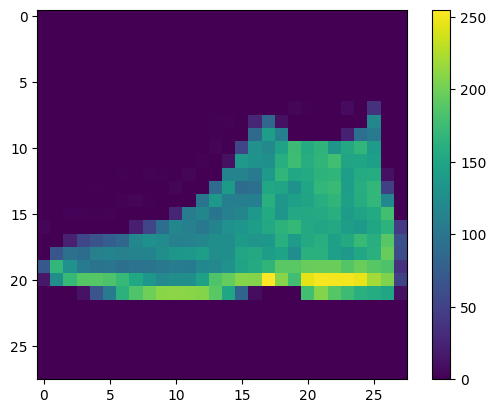

PREDICTION: 0


In [9]:
import argparse
import os  # os 모듈 import 추가
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms


def get_fashion_mnist_test_data():
    data_path = os.path.join("data", "j_fashion_mnist")  # 데이터 경로 설정
    f_mnist_test_images = datasets.FashionMNIST(data_path, train=False, download=True)
    f_mnist_test = datasets.FashionMNIST(
        data_path, train=False, download=True, transform=transforms.ToTensor()
    )

    test_data_loader = torch.utils.data.DataLoader(f_mnist_test, batch_size=1, shuffle=False)

    # 정규화를 위한 Transform
    f_mnist_transforms = transforms.Compose([
        transforms.ConvertImageDtype(torch.float),  # `float` 타입으로 변환
        transforms.Normalize((0.5,), (0.5,))  # 정규화 수행 (평균=0.5, 표준편차=0.5)
    ])

    return f_mnist_test_images, test_data_loader, f_mnist_transforms


class ClassificationTester:
    def __init__(self, project_name, model, test_data_loader, transforms, checkpoint_file_path):
        self.project_name = project_name
        self.model = model
        self.test_data_loader = test_data_loader
        self.transforms = transforms
        self.checkpoint_file_path = checkpoint_file_path

        self.load_checkpoint()

    def load_checkpoint(self):
        try:
            checkpoint = torch.load(self.checkpoint_file_path)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            self.model.eval()
            print("Model checkpoint loaded successfully.")
        except FileNotFoundError:
            print("Checkpoint file not found. Please train the model and save a checkpoint first.")

    def test(self):
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in self.test_data_loader:
                inputs = self.transforms(inputs)  # 정규화 적용
                outputs = self.model(inputs)
                _, predicted = outputs.max(1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        print(f"Test Accuracy: {100 * correct / total:.2f}%")

    def test_single(self, image):
        with torch.no_grad():
            image = self.transforms(image)  # 정규화 적용
            output = self.model(image)
            _, predicted = output.max(1)
            return predicted.item()


def main():
    fashion_mnist_test_images, test_data_loader, fashion_mnist_transforms = get_fashion_mnist_test_data()

    test_model = torch.nn.Sequential(  # 간단한 모델 정의 (학습된 모델로 교체 필요)
        torch.nn.Conv2d(1, 32, kernel_size=3, padding=1),
        torch.nn.ReLU(),
        torch.nn.Flatten(),
        torch.nn.Linear(32 * 28 * 28, 10),
    )
    checkpoint_file_path = "path_to_checkpoint.pth"  # 체크포인트 파일 경로 설정

    classification_tester = ClassificationTester(
        "cnn_fashion_mnist", test_model, test_data_loader, fashion_mnist_transforms, checkpoint_file_path
    )
    classification_tester.test()

    print()

    img, label = fashion_mnist_test_images[0]
    print("     LABEL:", label)
    plt.imshow(np.array(img), cmap="viridis")  # 컬러맵을 viridis로 변경
    plt.colorbar()
    plt.show()

    # torch.tensor(np.array(fashion_mnist_test_images[0][0])).unsqueeze(dim=0).unsqueeze(dim=0).shape: (1, 1, 28, 28)
    output = classification_tester.test_single(
        torch.tensor(np.array(fashion_mnist_test_images[0][0])).unsqueeze(dim=0).unsqueeze(dim=0)
    )
    print("PREDICTION:", output)


if __name__ == "__main__":
    main()


##### test2 - 2

Num Test Samples:  10000
Sample Shape:  torch.Size([1, 28, 28])
MODEL FILE: /content/checkpoints/cnn_fashion_mnist_checkpoint_latest.pt
TEST RESULTS: 89.160%
     LABEL: 5


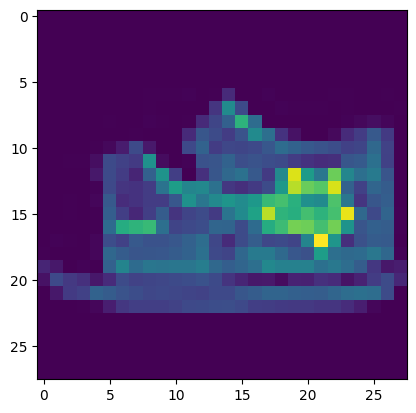

PREDICTION: 7


In [ ]:
def main():
  fashion_mnist_test_images, test_data_loader, fashion_mnist_transforms = get_fashion_mnist_test_data()

  test_model = get_my_cnn_model()
  classification_tester = ClassificationTester(
    "cnn_fashion_mnist", test_model, test_data_loader, fashion_mnist_transforms, CHECKPOINT_FILE_PATH
  )
  classification_tester.test()

  index = 9999
  img, label = fashion_mnist_test_images[index] # 0 ~ 9999 (10000)
  print("     LABEL:", label)
  plt.imshow(img)
  plt.show()

  # torch.tensor(np.array(mnist_test_images[0][0])).unsqueeze(dim=0).unsqueeze(dim=0).shape: (1, 1, 28, 28)
  output = classification_tester.test_single(
    torch.tensor(np.array(fashion_mnist_test_images[index][0])).unsqueeze(dim=0).unsqueeze(dim=0)
  )
  print("PREDICTION:", output)


if __name__ == "__main__":
  main()


##### test5

Num Test Samples:  10000
Sample Shape:  torch.Size([1, 28, 28])
MODEL FILE: /content/checkpoints/cnn_fashion_mnist_checkpoint_latest.pt
TEST RESULTS: 89.640%
     LABEL: 5


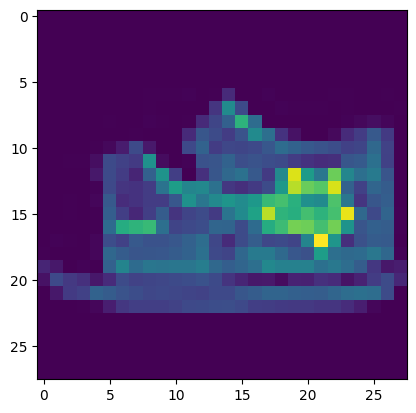

PREDICTION: 5


In [ ]:
def main():
  fashion_mnist_test_images, test_data_loader, fashion_mnist_transforms = get_fashion_mnist_test_data()

  test_model = get_my_cnn_model_with_dropout()
  classification_tester = ClassificationTester(
    "cnn_fashion_mnist", test_model, test_data_loader, fashion_mnist_transforms, CHECKPOINT_FILE_PATH
  )
  classification_tester.test()

  index = 9999
  img, label = fashion_mnist_test_images[index] # 0 ~ 9999 (10000)
  print("     LABEL:", label)
  plt.imshow(img)
  plt.show()

  # torch.tensor(np.array(mnist_test_images[0][0])).unsqueeze(dim=0).unsqueeze(dim=0).shape: (1, 1, 28, 28)
  output = classification_tester.test_single(
    torch.tensor(np.array(fashion_mnist_test_images[index][0])).unsqueeze(dim=0).unsqueeze(dim=0)
  )
  print("PREDICTION:", output)


if __name__ == "__main__":
  main()


##### test6

Num Test Samples:  10000
Sample Shape:  torch.Size([1, 28, 28])
MODEL FILE: /content/checkpoints/cnn_fashion_mnist_checkpoint_latest.pt
TEST RESULTS: 89.500%
     LABEL: 5


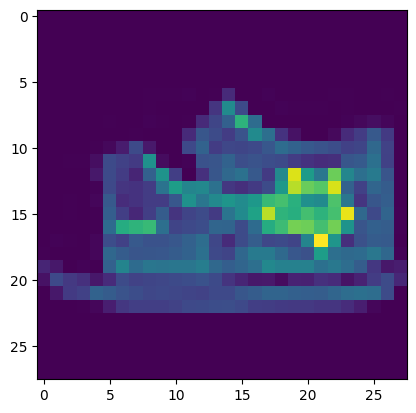

PREDICTION: 7


In [ ]:
def main():
  fashion_mnist_test_images, test_data_loader, fashion_mnist_transforms = get_fashion_mnist_test_data()

  test_model = get_my_cnn_model_with_dropout_batchNormalization()
  classification_tester = ClassificationTester(
    "cnn_fashion_mnist", test_model, test_data_loader, fashion_mnist_transforms, CHECKPOINT_FILE_PATH
  )
  classification_tester.test()

  index = 9999
  img, label = fashion_mnist_test_images[index] # 0 ~ 9999 (10000)
  print("     LABEL:", label)
  plt.imshow(img)
  plt.show()

  # torch.tensor(np.array(mnist_test_images[0][0])).unsqueeze(dim=0).unsqueeze(dim=0).shape: (1, 1, 28, 28)
  output = classification_tester.test_single(
    torch.tensor(np.array(fashion_mnist_test_images[index][0])).unsqueeze(dim=0).unsqueeze(dim=0)
  )
  print("PREDICTION:", output)


if __name__ == "__main__":
  main()


##### test7

Num Test Samples:  10000
Sample Shape:  torch.Size([1, 28, 28])
MODEL FILE: /content/checkpoints/cnn_fashion_mnist_checkpoint_latest.pt
TEST RESULTS: 90.030%
     LABEL: 5


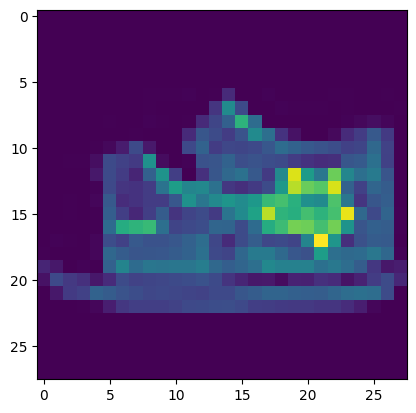

PREDICTION: 7


In [ ]:
def main():
  fashion_mnist_test_images, test_data_loader, fashion_mnist_transforms = get_fashion_mnist_test_data()

  test_model = get_my_cnn_model_with_dropout_layerNormalization()
  classification_tester = ClassificationTester(
    "cnn_fashion_mnist", test_model, test_data_loader, fashion_mnist_transforms, CHECKPOINT_FILE_PATH
  )
  classification_tester.test()

  index = 9999
  img, label = fashion_mnist_test_images[index] # 0 ~ 9999 (10000)
  print("     LABEL:", label)
  plt.imshow(img)
  plt.show()

  # torch.tensor(np.array(mnist_test_images[0][0])).unsqueeze(dim=0).unsqueeze(dim=0).shape: (1, 1, 28, 28)
  output = classification_tester.test_single(
    torch.tensor(np.array(fashion_mnist_test_images[index][0])).unsqueeze(dim=0).unsqueeze(dim=0)
  )
  print("PREDICTION:", output)


if __name__ == "__main__":
  main()


##### test8

Num Test Samples:  10000
Sample Shape:  torch.Size([1, 28, 28])
MODEL FILE: /content/checkpoints/cnn_fashion_mnist_checkpoint_latest.pt
TEST RESULTS: 88.090%
     LABEL: 5


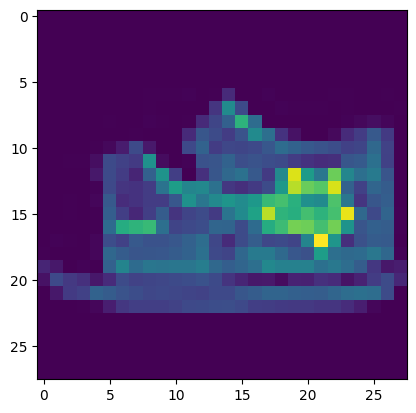

PREDICTION: 7


In [ ]:
def main():
  fashion_mnist_test_images, test_data_loader, fashion_mnist_transforms = get_fashion_mnist_test_data()

  test_model = get_my_cnn_model_with_dropout_layerNormalization()
  classification_tester = ClassificationTester(
    "cnn_fashion_mnist", test_model, test_data_loader, fashion_mnist_transforms, CHECKPOINT_FILE_PATH
  )
  classification_tester.test()

  index = 9999
  img, label = fashion_mnist_test_images[index] # 0 ~ 9999 (10000)
  print("     LABEL:", label)
  plt.imshow(img)
  plt.show()

  # torch.tensor(np.array(mnist_test_images[0][0])).unsqueeze(dim=0).unsqueeze(dim=0).shape: (1, 1, 28, 28)
  output = classification_tester.test_single(
    torch.tensor(np.array(fashion_mnist_test_images[index][0])).unsqueeze(dim=0).unsqueeze(dim=0)
  )
  print("PREDICTION:", output)


if __name__ == "__main__":
  main()


# [문제3]학습완료된모델로테스트데이터Accuracy확인하기

# [문제4]샘플테스트데이터분류예측결과확인하기

In [ ]:
import os
import glob
import torch
import librosa
import argparse

from utils.audio import Audio
from utils.hparams import HParam
from model.model import VoiceFilter
from model.embedder import SpeechEmbedder

import soundfile as sf  # Additional import


def main(args, hp):
    with torch.no_grad():
        # Move model and embedder creation to CPU
        model = VoiceFilter(hp).cpu()
        chkpt_model = torch.load(args.checkpoint_path, map_location='cpu')['model']
        model.load_state_dict(chkpt_model)
        model.eval()

        embedder = SpeechEmbedder(hp).cpu()
        chkpt_embed = torch.load(args.embedder_path, map_location='cpu')
        embedder.load_state_dict(chkpt_embed)
        embedder.eval()

        audio = Audio(hp)
        dvec_wav, _ = librosa.load(args.reference_file, sr=16000)
        dvec_mel = audio.get_mel(dvec_wav)
        dvec_mel = torch.from_numpy(dvec_mel).float()  # No cuda()

        dvec = embedder(dvec_mel)
        dvec = dvec.unsqueeze(0)

        mixed_wav, _ = librosa.load(args.mixed_file, sr=16000)
        mag, phase = audio.wav2spec(mixed_wav)
        mag = torch.from_numpy(mag).float()  # No cuda()

        mag = mag.unsqueeze(0)
        mask = model(mag, dvec)
        est_mag = mag * mask

        est_mag = est_mag[0].cpu().detach().numpy()
        est_wav = audio.spec2wav(est_mag, phase)

        os.makedirs(args.out_dir, exist_ok=True)
        out_path = os.path.join(args.out_dir, 'result.wav')
        sf.write(out_path, est_wav, 16000)  # No cuda() required


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('-c', '--config', type=str, required=True,
                        help="yaml file for configuration")
    parser.add_argument('-e', '--embedder_path', type=str, required=True,
                        help="path of embedder model pt file")
    parser.add_argument('--checkpoint_path', type=str, default=None,
                        help="path of checkpoint pt file")
    parser.add_argument('-m', '--mixed_file', type=str, required=True,
                        help='path of mixed wav file')
    parser.add_argument('-r', '--reference_file', type=str, required=True,
                        help='path of reference wav file')
    parser.add_argument('-o', '--out_dir', type=str, required=True,
                        help='directory of output')

    args = parser.parse_args()

    hp = HParam(args.config)

    print(args)

    main(args, hp)


 # “숙제 후기”

train6 - train5 + batchNormalization가 92.67%로 가장 높은 값을 얻었고 최적의 하이퍼파라미터이다

이번 숙제를 하면서, Fashion MNIST 데이터에 대해 학습시키는 과정에서 정말 많은 것을 배웠습니다. 특히, 데이터 정규화를 위해 Mean과 Std 값을 찾는 작업부터 CNN 모델을 설계하고 학습시키는 과정까지 하나하나 경험할 수 있어 유익했습니다. Validation Accuracy와 Test Accuracy를 목표치 이상으로 달성하기 위해 다양한 최적화 기법과 데이터 증강(Augmentation)을 시도해 보면서, 모델 성능을 개선하는 방법에 대해 깊이 고민할 수 있었습니다.

WandB를 사용하여 학습 과정의 그래프를 실시간으로 확인할 수 있었던 점도 흥미로웠습니다. 이전에는 이런 툴을 사용해 본 적이 없어서 익숙하지 않았지만, 이번 기회를 통해 효율적으로 학습 과정을 관리하고 분석하는 방법을 배울 수 있었습니다.

다만, 과제를 하면서 가장 어려웠던 점은 Validation Accuracy와 Test Accuracy를 각각 94.0%와 93.0% 이상으로 끌어올리는 것이었습니다. 하이퍼파라미터를 조정하거나 학습률, 배치 크기, Dropout, 정규화 기법 등을 최적화하는 과정이 쉽지 않았습니다. 특히, 새로운 기법을 적용했을 때 성능이 개선되지 않을 때는 정말 답답하기도 했습니다. 그래도 포기하지 않고 다양한 시도를 해본 덕분에, 조금씩 결과가 나아지는 것을 보며 성취감을 느꼈습니다.

마지막으로, 테스트 데이터에서 틀린 이미지를 분석하며 모델의 한계를 파악하는 것도 흥미로운 작업이었습니다. 학습된 모델이 단순히 정답만 맞추는 것이 아니라, 왜 틀렸는지 이해하려고 노력한 경험이 앞으로 큰 도움이 될 것 같습니다.

이번 숙제를 통해, 모델 성능을 개선하기 위한 노력뿐만 아니라 결과를 분석하고 해석하는 능력도 키울 수 있었던 것 같아 뿌듯합니다. 하지만 과제가 꽤 난이도가 있어서 시간을 많이 투자해야 했다는 점은 조금 아쉽기도 했습니다. 그래도 이런 과정을 통해 많이 성장할 수 있었던 것 같아 보람찬 숙제였습니다